Sales Methods Analysis
======================

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import numpy as np

In [ ]:
file = 'product_sales.csv'
original_data = pd.read_csv(file, sep=',')

In [4]:
# Optional if my_style not in use:

## color palette can be passed as a list of hex codes
#custom_colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
## set overall plot style, font size scaling factor, and color palette
#sns.set(style="whitegrid", font_scale=1.2, palette=custom_colors)

## First looks into the raw data
### First five rows


In [6]:
print("\n\n\n                              Table 1. The original data base file first five rows.\n")
original_data.head(10)




                              Table 1. The original data base file first five rows.



,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia
7,1,Email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,Oklahoma
8,5,Email,771586bd-7b64-40be-87df-afe884d2af9e,11,108.34,10,31,Massachusetts
9,5,Call,56491dae-bbe7-49f0-a651-b823a01103d8,11,53.82,7,23,Missouri


In [7]:
df_ = original_data.copy()

In [8]:
# print("Searching uniqueness and null values")

# cols = df.columns

# data = []

# for col in cols:
#     # Searching for uniqueness
#     print("\n\n-----------------------------------", df.groupby(col).customer_id.nunique().sort_values(ascending=False).head())

#     unique_values_count = len(pd.unique(df[col]))
#     print(f"---\nUnique values count in {col}: {unique_values_count}")

#     # Searching for null values
#     null_count = df[col].isnull().sum()
#     print(f"---\nNull values count for {col}: {null_count}")
#     data.append(null_count)

### Searching for uniqueness and null values
Table 2 shows the unique and null values for the original data base. Some actions must be taken to clean the data, regarding the following cases:
- **Missing values**: Interestingly, only the Revenue field contains missing values. Amongst several ways to deal with them, the action taken was to select all values that are not missing, instead of dropping the nulls;
- **Regex adjustment & typos**: The 'sales_method' field has values that mean the same, however, registered differently --- Email and email, and Email + Call and em + call. The values of the column 'states' were validated with a simple checking as illustrated in Table 3;
- **Case adjustment**: 'customer_id', 'state', and 'sales_method' were replaced by only lower case letters.

In [10]:
print("\n\n\n                                        Table 2. Unique and null values for the original data base.\n")
# Lista de colunas no DataFrame
cols = df_.columns
pd.set_option('max_colwidth',85)
# Criação de um dicionário para armazenar os resultados temporariamente
results = {
    'Column': [],
    'Top 5 Unique Values': [],
    'Unique Values Count': [],
    'Null Values Count': [],
}

# Loop pelas colunas do DataFrame
for col in cols:
    # Unique values
    top_unique_vals = df_.groupby(col).customer_id.nunique().sort_values(ascending=False).head()
    unique_values_count = len(pd.unique(df_[col]))
    
    # Null values
    null_count = df_[col].isnull().sum()

    # Appending
    results['Column'].append(col)
    results['Top 5 Unique Values'].append(top_unique_vals.to_dict())
    results['Unique Values Count'].append(unique_values_count)
    results['Null Values Count'].append(null_count)

# Data framing
results_df_ = pd.DataFrame(results)

results_df_.head(10)




                                        Table 2. Unique and null values for the original data base.



,Column,Top 5 Unique Values,Unique Values Count,Null Values Count
0,week,"{1: 3721, 4: 2575, 5: 2574, 2: 2491, 3: 2411}",6,0
1,sales_method,"{'Email': 7456, 'Call': 4962, 'Email + Call': 2549, 'em + call': 23, 'email': 10}",5,0
2,customer_id,"{'00019f95-cd18-4a2a-aa62-512cc6b17ac5': 1, 'a907f16b-2481-4ac6-95bd-6161e15cbe08...",15000,0
3,nb_sold,"{10: 3677, 9: 3535, 11: 2439, 8: 1941, 12: 1088}",10,0
4,revenue,"{51.86: 11, 53.25: 10, 52.51: 10, 98.42: 9, 51.58: 9}",6744,1074
5,years_as_customer,"{1: 2504, 2: 1987, 3: 1619, 0: 1471, 4: 1338}",42,0
6,nb_site_visits,"{25: 1688, 26: 1645, 24: 1601, 23: 1478, 27: 1440}",27,0
7,state,"{'California': 1872, 'Texas': 1187, 'New York': 965, 'Florida': 904, 'Illinois': ...",50,0


In [11]:
print("\nTable 3. The names of all states present in the data.\n")
display(df_.groupby('state').state.nunique().sort_values(ascending=False))


Table 3. The names of all states present in the data.



state
Alabama           1
Pennsylvania      1
Nevada            1
New Hampshire     1
New Jersey        1
New Mexico        1
New York          1
North Carolina    1
North Dakota      1
Ohio              1
Oklahoma          1
Oregon            1
Rhode Island      1
Alaska            1
South Carolina    1
South Dakota      1
Tennessee         1
Texas             1
Utah              1
Vermont           1
Virginia          1
Washington        1
West Virginia     1
Wisconsin         1
Nebraska          1
Montana           1
Missouri          1
Mississippi       1
Arizona           1
Arkansas          1
California        1
Colorado          1
Connecticut       1
Delaware          1
Florida           1
Georgia           1
Hawaii            1
Idaho             1
Illinois          1
Indiana           1
Iowa              1
Kansas            1
Kentucky          1
Louisiana         1
Maine             1
Maryland          1
Massachusetts     1
Michigan          1
Minnesota         1
Wyoming       

Table 4 shows the data after the adjustments and Table 5 shows the unique and null values for the transformed data.

In [13]:
df = df_.copy() # df is the transformed dataframe

In [14]:
print("\n\n\n                                        Table 4. Data after cleaning and adjustments.\n")

df = df.replace(to_replace='em + call', value='email + call')
df['sales_method'] = df.sales_method.str.lower()
df['customer_id'] = df.customer_id.str.lower()
df['state'] = df.state.str.lower()
df = df[df['revenue'].notna()]
display(df.head(10))

##################################################

print("\n\n\n                                        Table 5. Unique and null values for the transformed data base.\n")
# Lista de colunas no DataFrame
cols = df.columns
pd.set_option('max_colwidth', 85)
# Criação de um dicionário para armazenar os resultados temporariamente
results = {
    'Column': [],
    'Top 5 Unique Values': [],
    'Unique Values Count': [],
    'Null Values Count': [],
}

# Loop pelas colunas do DataFrame
for col in cols:
    # Unique values
    top_unique_vals = df.groupby(col).customer_id.nunique().sort_values(ascending=False).head()
    unique_values_count = len(pd.unique(df[col]))
    
    # Null values
    null_count = df[col].isnull().sum()

    # Appending
    results['Column'].append(col)
    results['Top 5 Unique Values'].append(top_unique_vals.to_dict())
    results['Unique Values Count'].append(unique_values_count)
    results['Null Values Count'].append(null_count)

# Data framing
results_df = pd.DataFrame(results)

display(results_df.head(10))




                                        Table 4. Data after cleaning and adjustments.



,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
1,6,email + call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,kansas
2,5,call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,wisconsin
4,3,email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,illinois
5,6,call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,mississippi
6,4,email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,georgia
7,1,email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,oklahoma
8,5,email,771586bd-7b64-40be-87df-afe884d2af9e,11,108.34,10,31,massachusetts
9,5,call,56491dae-bbe7-49f0-a651-b823a01103d8,11,53.82,7,23,missouri
10,3,email,c40f2602-8a7c-429e-bf13-cb1ec9e5f92f,9,89.49,4,28,texas
11,2,call,c20ab049-cbac-4ba7-8868-310aa89e0549,9,45.42,2,23,new york





                                        Table 5. Unique and null values for the transformed data base.



,Column,Top 5 Unique Values,Unique Values Count,Null Values Count
0,week,"{1: 3497, 4: 2387, 5: 2366, 2: 2323, 3: 2257}",6,0
1,sales_method,"{'email': 6922, 'call': 4781, 'email + call': 2223}",3,0
2,customer_id,"{'00020b38-1ebb-427f-88d1-c60f3c426cfe': 1, 'a9799385-fad7-45ea-b2e4-490224ead562...",13926,0
3,nb_sold,"{10: 3424, 9: 3316, 11: 2276, 8: 1838, 12: 961}",10,0
4,revenue,"{51.86: 11, 53.25: 10, 52.51: 10, 98.42: 9, 51.58: 9}",6743,0
5,years_as_customer,"{1: 2336, 2: 1841, 3: 1500, 0: 1348, 4: 1232}",42,0
6,nb_site_visits,"{25: 1557, 26: 1524, 24: 1477, 23: 1380, 27: 1345}",26,0
7,state,"{'california': 1739, 'texas': 1109, 'new york': 899, 'florida': 826, 'illinois': ...",50,0


### Descriptive statistics
Tables 6 and 7 illustrate the descriptive statistics of the fields. It is possible to observe that the data transformation discussed in the previous chapters has minor effects on measures of spread. 

In [16]:
print("\n          Table 6. Descriptive statistics of the original data base.\n")
display(original_data.describe().round(1))

print("\n\n\n          Table 7. Descriptive statistics of the transformed data base.\n")
display(df.describe().round(1))


          Table 6. Descriptive statistics of the original data base.



,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.0,15000.0,13926.0,15000.0,15000.0
mean,3.1,10.1,93.9,5.0,25.0
std,1.7,1.8,47.4,5.0,3.5
min,1.0,7.0,32.5,0.0,12.0
25%,2.0,9.0,52.5,1.0,23.0
50%,3.0,10.0,89.5,3.0,25.0
75%,5.0,11.0,107.3,7.0,27.0
max,6.0,16.0,238.3,63.0,41.0





          Table 7. Descriptive statistics of the transformed data base.



,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,13926.0,13926.0,13926.0,13926.0,13926.0
mean,3.1,10.0,93.9,5.0,24.9
std,1.7,1.8,47.4,5.0,3.5
min,1.0,7.0,32.5,0.0,12.0
25%,1.0,9.0,52.5,1.0,23.0
50%,3.0,10.0,89.5,3.0,25.0
75%,4.0,11.0,107.3,7.0,27.0
max,6.0,16.0,238.3,63.0,37.0


## Searching outliers

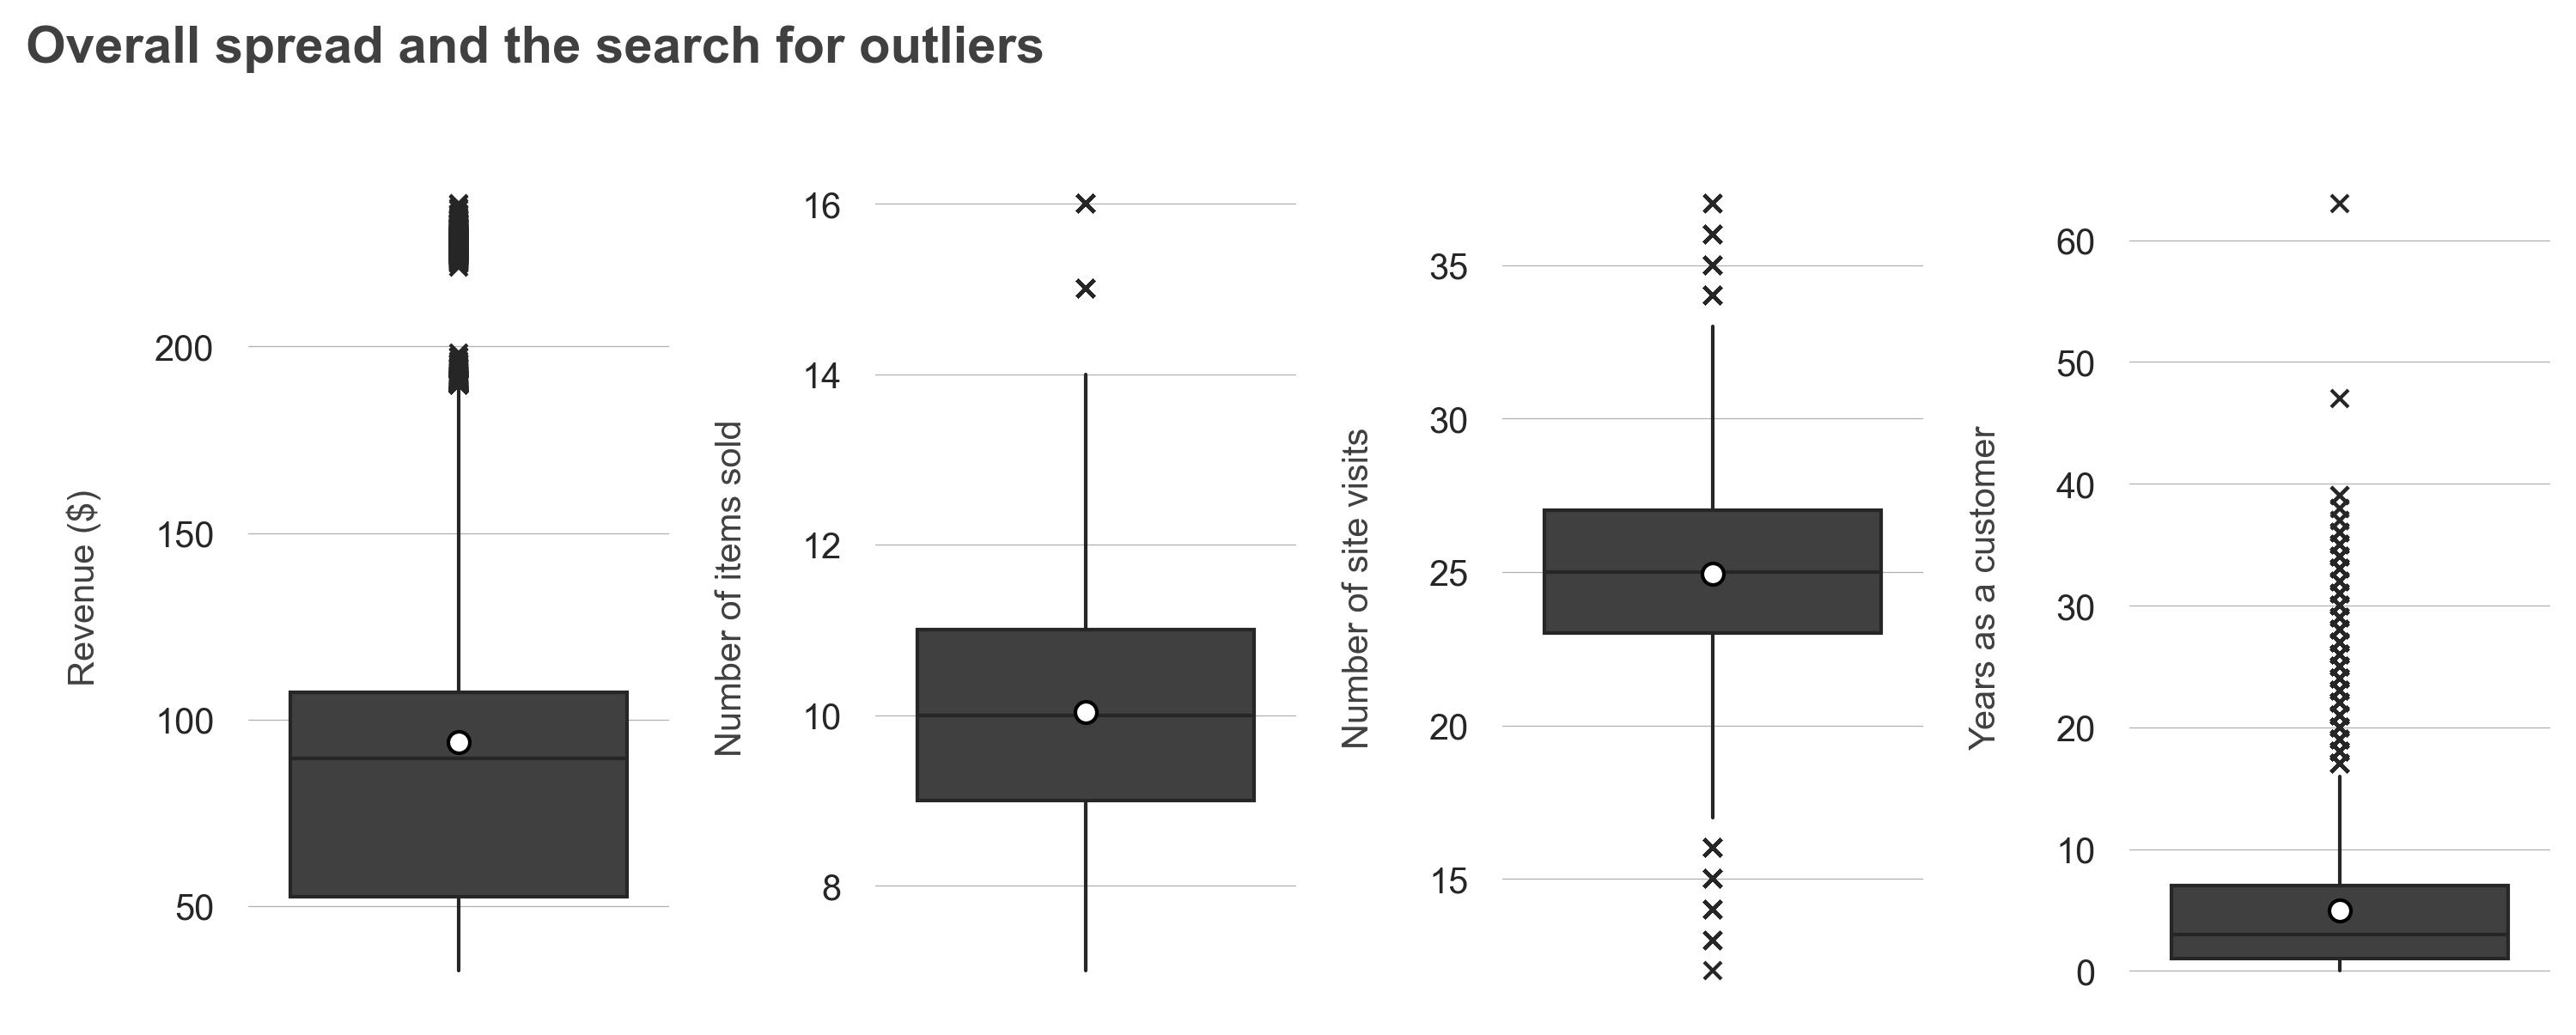

In [18]:
# Set style
sns.set_theme(style="whitegrid")  # White background, no gridlines
plt.style.use('my_style.mplstyle')
sns.set_palette('colorblind')

# Create box plot
fig, axs = plt.subplots(figsize=(10, 4), dpi=300, ncols=4)

fig.suptitle("Overall spread and the search for outliers", weight='bold', y=1, size='larger', x=0.2)

box = sns.boxplot(
    #x="sales_method",
    y="revenue",
    data=df,  # Replace `df` with your DataFrame
    color='#404040',
    showmeans=True,  # Optional: show mean as a marker
    flierprops={"marker": "x"},
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"},
    notch=False, showcaps=False,
    ax=axs[0]
)
axs[0].set(ylabel="Revenue ($)")

box = sns.boxplot(
    #x="sales_method",
    y="nb_sold",
    data=df,  # Replace `df` with your DataFrame
    color='#404040',
    showmeans=True,  # Optional: show mean as a marker
    flierprops={"marker": "x"},
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"},
    notch=False, showcaps=False,
    ax=axs[1]
)
axs[1].set(ylabel="Number of items sold")

box = sns.boxplot(
    #x="sales_method",
    y="nb_site_visits",
    data=df,  # Replace `df` with your DataFrame
    color='#404040',
    showmeans=True,  # Optional: show mean as a marker
    flierprops={"marker": "x"},
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"},
    notch=False, showcaps=False,
    ax=axs[2]
)
axs[2].set(ylabel="Number of site visits")

box = sns.boxplot(
    #x="sales_method",
    y="years_as_customer",
    data=df,  # Replace `df` with your DataFrame
    color='#404040',
    showmeans=True,  # Optional: show mean as a marker
    flierprops={"marker": "x"},
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"},
    notch=False, showcaps=False,
    ax=axs[3]
)
axs[3].set(ylabel="Years as a customer")

plt.tight_layout()
fig.subplots_adjust()

plt.show()

In [19]:
# List of key figures to analyze
key_figures = ['revenue', 'nb_sold', 'nb_site_visits', 'years_as_customer']

# Initialize a dictionary to store outlier information
outliers_dict = {key: [] for key in key_figures}

# Calculate outliers for each key figure
for key in key_figures:
    Q1 = df.groupby('sales_method')[key].quantile(0.25)
    Q3 = df.groupby('sales_method')[key].quantile(0.75)
    IQR = Q3 - Q1

    # Map Q1, Q3, and IQR to the original DataFrame
    df[f'Q1_{key}'] = df['sales_method'].map(Q1)
    df[f'Q3_{key}'] = df['sales_method'].map(Q3)
    df[f'IQR_{key}'] = df['sales_method'].map(IQR)

    # Define outliers
    outliers = ((df[key] < (df[f'Q1_{key}'] - 1.5 * df[f'IQR_{key}'])) |
               (df[key] > (df[f'Q3_{key}'] + 1.5 * df[f'IQR_{key}'])))
    
    # Store outlier information
    outliers_dict[key] = outliers

# Create a summary table of outliers
outliers_summary = pd.DataFrame(outliers_dict)

# Add a column to count the number of key figures for which each row is an outlier
outliers_summary['total_outliers'] = outliers_summary.sum(axis=1)

# Filter rows that are outliers for at least one key figure
outliers_table = df[outliers_summary.any(axis=1)].copy()
outliers_table['total_outliers'] = outliers_summary['total_outliers']

# Display the summary table
print("Outliers Summary Table:")
display(outliers_table)

# Overwrite the original df with the cleaned version
df_cleaned = df[~outliers_summary.any(axis=1)]

# Drop the temporary columns (Q1_*, Q3_*, IQR_*) to keep only the original columns
df_cleaned = df_cleaned.drop(columns=[col for col in df.columns if col.startswith(('Q1_', 'Q3_', 'IQR_'))])

# Now, df contains the cleaned data, and you can continue using it in your code
print("\nCleaned DataFrame (without outliers):")
display(df_cleaned)

Outliers Summary Table:


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state,Q1_revenue,Q3_revenue,...,Q1_nb_sold,Q3_nb_sold,IQR_nb_sold,Q1_nb_site_visits,Q3_nb_site_visits,IQR_nb_site_visits,Q1_years_as_customer,Q3_years_as_customer,IQR_years_as_customer,total_outliers
22,3,email + call,d72de17a-0d71-401b-b64a-dc4492b2b1ed,10,150.47,20,21,north carolina,155.775,191.11,...,10.0,13.0,3.0,24.0,29.0,5.0,1.0,6.0,5.0,1
31,2,email,7b9df531-08cf-4d25-9e13-438f9f33eeeb,10,103.47,17,21,hawaii,87.880,105.17,...,9.0,11.0,2.0,23.0,27.0,4.0,1.0,7.0,6.0,1
32,5,call,57a6a6fd-842f-4b28-8033-b2137096f086,11,55.74,36,26,colorado,41.470,52.68,...,8.0,11.0,3.0,22.0,27.0,5.0,1.0,7.0,6.0,1
70,2,call,25ba0890-1ca2-4821-916b-e659555b1266,9,45.58,19,24,kansas,41.470,52.68,...,8.0,11.0,3.0,22.0,27.0,5.0,1.0,7.0,6.0,1
79,5,email,d42b0e9b-8e2f-4c4e-b94e-cf5db08adc7a,11,107.12,10,35,georgia,87.880,105.17,...,9.0,11.0,2.0,23.0,27.0,4.0,1.0,7.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14915,5,email + call,f212ea05-88af-4789-b98f-0c55ac7748ad,12,185.31,15,21,texas,155.775,191.11,...,10.0,13.0,3.0,24.0,29.0,5.0,1.0,6.0,5.0,1
14937,2,call,352ed194-a65c-42fe-b24f-806a0af46ca5,9,42.89,24,21,massachusetts,41.470,52.68,...,8.0,11.0,3.0,22.0,27.0,5.0,1.0,7.0,6.0,1
14938,6,email,76fdf082-52eb-4005-9688-bfd34ca74343,14,136.47,9,28,pennsylvania,87.880,105.17,...,9.0,11.0,2.0,23.0,27.0,4.0,1.0,7.0,6.0,1
14959,6,email,ce49e3fb-7b8f-40f3-b9e0-23690260642e,13,134.37,8,25,indiana,87.880,105.17,...,9.0,11.0,2.0,23.0,27.0,4.0,1.0,7.0,6.0,1



Cleaned DataFrame (without outliers):


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
1,6,email + call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,kansas
2,5,call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,wisconsin
4,3,email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,illinois
5,6,call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,mississippi
6,4,email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,georgia
...,...,...,...,...,...,...,...,...
14994,4,email,56f02e26-3633-427d-8c4e-f45f00afa787,11,109.36,3,25,ohio
14995,4,call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,pennsylvania
14996,5,call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,kansas
14997,1,call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,west virginia


In [116]:
print("\n\n\n                                        Table 5. Unique and null values for the transformed data base.\n")
# Lista de colunas no DataFrame
cols = df.columns
pd.set_option('max_colwidth', 85)
# Criação de um dicionário para armazenar os resultados temporariamente
results = {
    'Column': [],
    'Top 5 Unique Values': [],
    'Unique Values Count': [],
    'Null Values Count': [],
}

# Loop pelas colunas do DataFrame
for col in cols:
    # Unique values
    top_unique_vals = df.groupby(col).customer_id.nunique().sort_values(ascending=False).head()
    unique_values_count = len(pd.unique(df[col]))
    
    # Null values
    null_count = df[col].isnull().sum()

    # Appending
    results['Column'].append(col)
    results['Top 5 Unique Values'].append(top_unique_vals.to_dict())
    results['Unique Values Count'].append(unique_values_count)
    results['Null Values Count'].append(null_count)

# Data framing
results_df = pd.DataFrame(results)

display(results_df[0:8])




                                        Table 5. Unique and null values for the transformed data base.



,Column,Top 5 Unique Values,Unique Values Count,Null Values Count
0,week,"{1: 3295, 4: 2300, 5: 2261, 2: 2224, 3: 2151}",6,0
1,sales_method,"{'email': 6523, 'call': 4579, 'email + call': 2091}",3,0
2,customer_id,"{'00020b38-1ebb-427f-88d1-c60f3c426cfe': 1, 'a9620439-f29c-4e96-905a-2b2deb9ea535...",13193,0
3,nb_sold,"{10: 3275, 9: 3184, 11: 2194, 8: 1719, 12: 918}",10,0
4,revenue,"{52.51: 10, 51.86: 10, 51.91: 9, 53.25: 9, 53.69: 9}",6498,0
5,years_as_customer,"{1: 2302, 2: 1809, 3: 1482, 0: 1332, 4: 1209}",17,0
6,nb_site_visits,"{25: 1491, 26: 1456, 24: 1414, 23: 1316, 27: 1289}",22,0
7,state,"{'california': 1645, 'texas': 1044, 'new york': 849, 'florida': 770, 'illinois': ...",50,0


## Looking to descriptive statistics after cleaning outliers

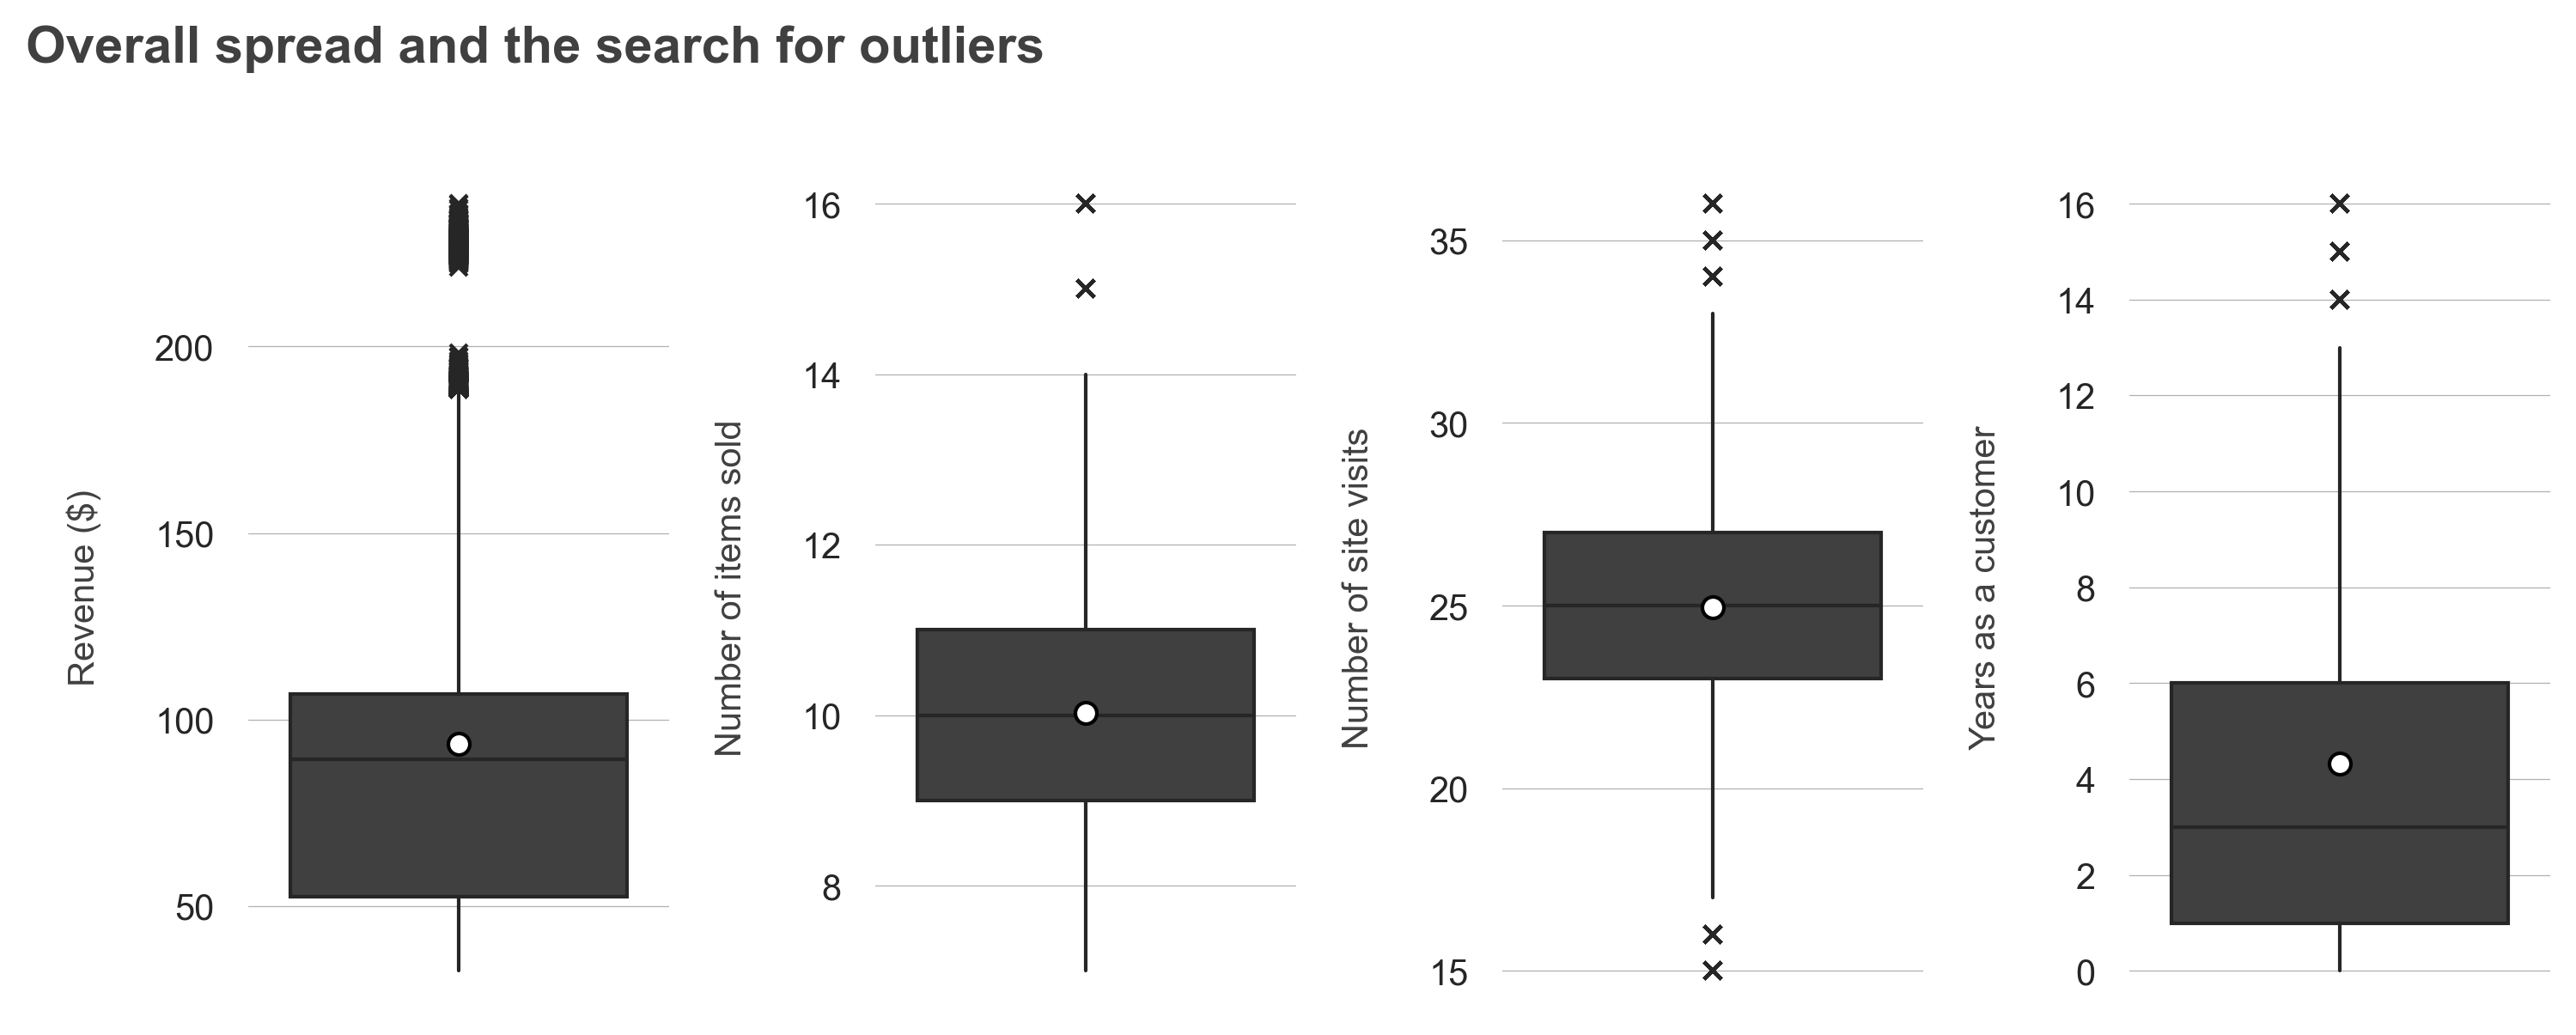

In [21]:
# Set style
sns.set_theme(style="whitegrid")  # White background, no gridlines
plt.style.use('my_style.mplstyle')
sns.set_palette('colorblind')

# Create box plot
fig, axs = plt.subplots(figsize=(10, 4), dpi=300, ncols=4)

fig.suptitle("Overall spread and the search for outliers", weight='bold', y=1, size='larger', x=0.2)

box = sns.boxplot(
    #x="sales_method",
    y="revenue",
    data=df_cleaned,  # Replace `df` with your DataFrame
    color='#404040',
    showmeans=True,  # Optional: show mean as a marker
    flierprops={"marker": "x"},
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"},
    notch=False, showcaps=False,
    ax=axs[0]
)
axs[0].set(ylabel="Revenue ($)")

box = sns.boxplot(
    #x="sales_method",
    y="nb_sold",
    data=df_cleaned,  # Replace `df` with your DataFrame
    color='#404040',
    showmeans=True,  # Optional: show mean as a marker
    flierprops={"marker": "x"},
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"},
    notch=False, showcaps=False,
    ax=axs[1]
)
axs[1].set(ylabel="Number of items sold")

box = sns.boxplot(
    #x="sales_method",
    y="nb_site_visits",
    data=df_cleaned,  # Replace `df` with your DataFrame
    color='#404040',
    showmeans=True,  # Optional: show mean as a marker
    flierprops={"marker": "x"},
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"},
    notch=False, showcaps=False,
    ax=axs[2]
)
axs[2].set(ylabel="Number of site visits")

box = sns.boxplot(
    #x="sales_method",
    y="years_as_customer",
    data=df_cleaned,  # Replace `df` with your DataFrame
    color='#404040',
    showmeans=True,  # Optional: show mean as a marker
    flierprops={"marker": "x"},
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"},
    notch=False, showcaps=False,
    ax=axs[3]
)
axs[3].set(ylabel="Years as a customer")

plt.tight_layout()
fig.subplots_adjust()

plt.show()

In [22]:
df = df_cleaned.copy() # df is the transformed dataframe

In [23]:
print("\n          Table 6. Descriptive statistics of the original data base.\n")
display(original_data.describe().round(1))

print("\n\n\n          Table 7. Descriptive statistics of the transformed data base.\n")
display(df.describe().round(1))


          Table 6. Descriptive statistics of the original data base.



,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.0,15000.0,13926.0,15000.0,15000.0
mean,3.1,10.1,93.9,5.0,25.0
std,1.7,1.8,47.4,5.0,3.5
min,1.0,7.0,32.5,0.0,12.0
25%,2.0,9.0,52.5,1.0,23.0
50%,3.0,10.0,89.5,3.0,25.0
75%,5.0,11.0,107.3,7.0,27.0
max,6.0,16.0,238.3,63.0,41.0





          Table 7. Descriptive statistics of the transformed data base.



,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,13193.0,13193.0,13193.0,13193.0,13193.0
mean,3.1,10.0,93.5,4.3,25.0
std,1.6,1.8,47.4,3.8,3.4
min,1.0,7.0,32.5,0.0,15.0
25%,2.0,9.0,52.4,1.0,23.0
50%,3.0,10.0,89.3,3.0,25.0
75%,4.0,11.0,106.8,6.0,27.0
max,6.0,16.0,238.3,16.0,36.0


In [24]:
# Investigating aggregations

columns_to_aggregate = ['years_as_customer', 'week', 'revenue', 'nb_sold', 'nb_site_visits']
aggregations = ['mean', 'median', 'sum', 'max', 'min']

agg_dict = {col: aggregations for col in columns_to_aggregate}
agg_dict['customer_id'] = 'count'

result = df.groupby('sales_method').agg(agg_dict)


print("\n\n\n          Table 8. Some aggregations for each field.\n")
display(result.T.round(0).astype(int))




          Table 8. Some aggregations for each field.



sales_method                call   email  email + call
years_as_customer mean         5       4             4
                  median       3       3             3
                  sum      20717   28545          7764
                  max         16      16            13
                  min          0       0             0
week              mean         3       2             4
                  median       4       2             5
                  sum      15677   15823          8973
                  max          6       6             6
                  min          1       1             1
revenue           mean        48      97           184
                  median      49      95           185
                  sum     217982  630989        385049
                  max         69     131           238
                  min         33      79           122
nb_sold           mean        10      10            12
                  median      10      10            12
                  sum      43512   63177         25547
                  max         14      13            16
                  min          7       8             8
nb_site_visits    mean        24      25            27
                  median      24      25            27
                  sum     111861  161354         55982
                  max         34      33            36
                  min         15      17            17
customer_id       count     4579    6523          2091

In [92]:
# Investigating aggregations
columns_to_aggregate = ['revenue']
aggregations = ['mean', 'median', 'sum', 'max', 'min']

agg_dict = {col: aggregations for col in columns_to_aggregate}
agg_dict['customer_id'] = 'count'

result3 = df.groupby(['sales_method', 'week']).agg(agg_dict)

display(result3.round(2))

revenue                                    customer_id
                     mean  median        sum     max     min       count
sales_method week                                                       
call         1      35.36   35.21   24507.65   40.47   32.54         693
             2      43.61   43.47   32492.37   50.19   40.84         745
             3      41.78   41.51   34722.52   50.66   38.97         831
             4      51.45   51.26   48565.54   57.74   48.21         944
             5      53.15   52.97   51606.65   58.01   50.40         971
             6      66.04   65.88   26087.54   69.47   63.54         395
email        1      87.56   86.59  217574.69  112.88   78.83        2485
             2     100.16   99.22  132405.24  124.24   91.56        1322
             3      92.76   91.80   94519.55  117.46   84.82        1019
             4     108.77  108.08  102790.53  126.01  100.59         945
             5     108.88  108.02   71316.23  127.87  101.29         655
             6     127.66  127.83   12383.02  130.85  123.48          97
email + call 1     128.86  128.59   15076.14  136.36  122.11         117
             2     154.27  154.27   24220.75  164.14  149.11         157
             3     150.37  149.84   45260.36  159.55  144.51         301
             4     180.87  180.62   74338.88  192.09  174.07         411
             5     187.55  187.12  119091.98  198.32  181.33         635
             6     227.79  227.40  107060.70  238.32  221.41         470

In [96]:
# Calculate revenue per customer
result4 = result3.copy()

result4['revenue_per_customer'] = result3[('revenue', 'mean')] / result3[('customer_id', 'count')]

# Round the results to 2 decimal places
result4 = result4.round(2)

# Display the results
display(result4)

revenue                                    customer_id  \
                     mean  median        sum     max     min       count   
sales_method week                                                          
call         1      35.36   35.21   24507.65   40.47   32.54         693   
             2      43.61   43.47   32492.37   50.19   40.84         745   
             3      41.78   41.51   34722.52   50.66   38.97         831   
             4      51.45   51.26   48565.54   57.74   48.21         944   
             5      53.15   52.97   51606.65   58.01   50.40         971   
             6      66.04   65.88   26087.54   69.47   63.54         395   
email        1      87.56   86.59  217574.69  112.88   78.83        2485   
             2     100.16   99.22  132405.24  124.24   91.56        1322   
             3      92.76   91.80   94519.55  117.46   84.82        1019   
             4     108.77  108.08  102790.53  126.01  100.59         945   
             5     108.88  108.02   71316.23  127.87  101.29         655   
             6     127.66  127.83   12383.02  130.85  123.48          97   
email + call 1     128.86  128.59   15076.14  136.36  122.11         117   
             2     154.27  154.27   24220.75  164.14  149.11         157   
             3     150.37  149.84   45260.36  159.55  144.51         301   
             4     180.87  180.62   74338.88  192.09  174.07         411   
             5     187.55  187.12  119091.98  198.32  181.33         635   
             6     227.79  227.40  107060.70  238.32  221.41         470   

                  revenue_per_customer  
                                        
sales_method week                       
call         1                   35.36  
             2                   43.61  
             3                   41.78  
             4                   51.45  
             5                   53.15  
             6                   66.04  
email        1                   87.56  
             2                  100.16  
             3                   92.76  
             4                  108.77  
             5                  108.88  
             6                  127.66  
email + call 1                  128.86  
             2                  154.27  
             3                  150.37  
             4                  180.87  
             5                  187.55  
             6                  227.79

In [25]:
display(result.round(2).astype(int))

years_as_customer                       week                    \
                          mean median    sum max min mean median    sum max   
sales_method                                                                  
call                         4      3  20717  16   0    3      4  15677   6   
email                        4      3  28545  16   0    2      2  15823   6   
email + call                 3      3   7764  13   0    4      5   8973   6   

                  ... nb_sold                nb_site_visits                 \
             min  ...  median    sum max min           mean median     sum   
sales_method      ...                                                        
call           1  ...      10  43512  14   7             24     24  111861   
email          1  ...      10  63177  13   8             24     25  161354   
email + call   1  ...      12  25547  16   8             26     27   55982   

                     customer_id  
             max min       count  
sales_method                      
call          34  15        4579  
email         33  17        6523  
email + call  36  17        2091  

[3 rows x 26 columns]

In [26]:
# Investigating aggregations

columns_to_aggregate = ['revenue', 'nb_sold']
aggregations = ['std', 'var']

agg_dict = {col: aggregations for col in columns_to_aggregate}

result2 = df.groupby('sales_method').agg(agg_dict)

display(result2.T)

sales_method       call       email  email + call
revenue std    8.493689   10.421639     29.056959
        var   72.142759  108.610552    844.306888
nb_sold std    1.710906    1.106756      1.929374
        var    2.927200    1.224909      3.722484

## Question 1: How many customers were there for each approach?

In [28]:
customer_id_by_approach = result.T[-1:]

print("\n\n\n Table 9. Number of customers for each approach.\n")
display(customer_id_by_approach)




 Table 9. Number of customers for each approach.



,sales_method,call,email,email + call
customer_id,count,4579.0,6523.0,2091.0


In [29]:
customer_id_by_approach_pivot = customer_id_by_approach.T.reset_index()
print(customer_id_by_approach_pivot.columns)
print(customer_id_by_approach_pivot.index)
customer_id_by_approach_pivot

MultiIndex([('sales_method',      ''),
            ( 'customer_id', 'count')],
           )
RangeIndex(start=0, stop=3, step=1)


,sales_method,customer_id
,,count
0,call,4579.0
1,email,6523.0
2,email + call,2091.0


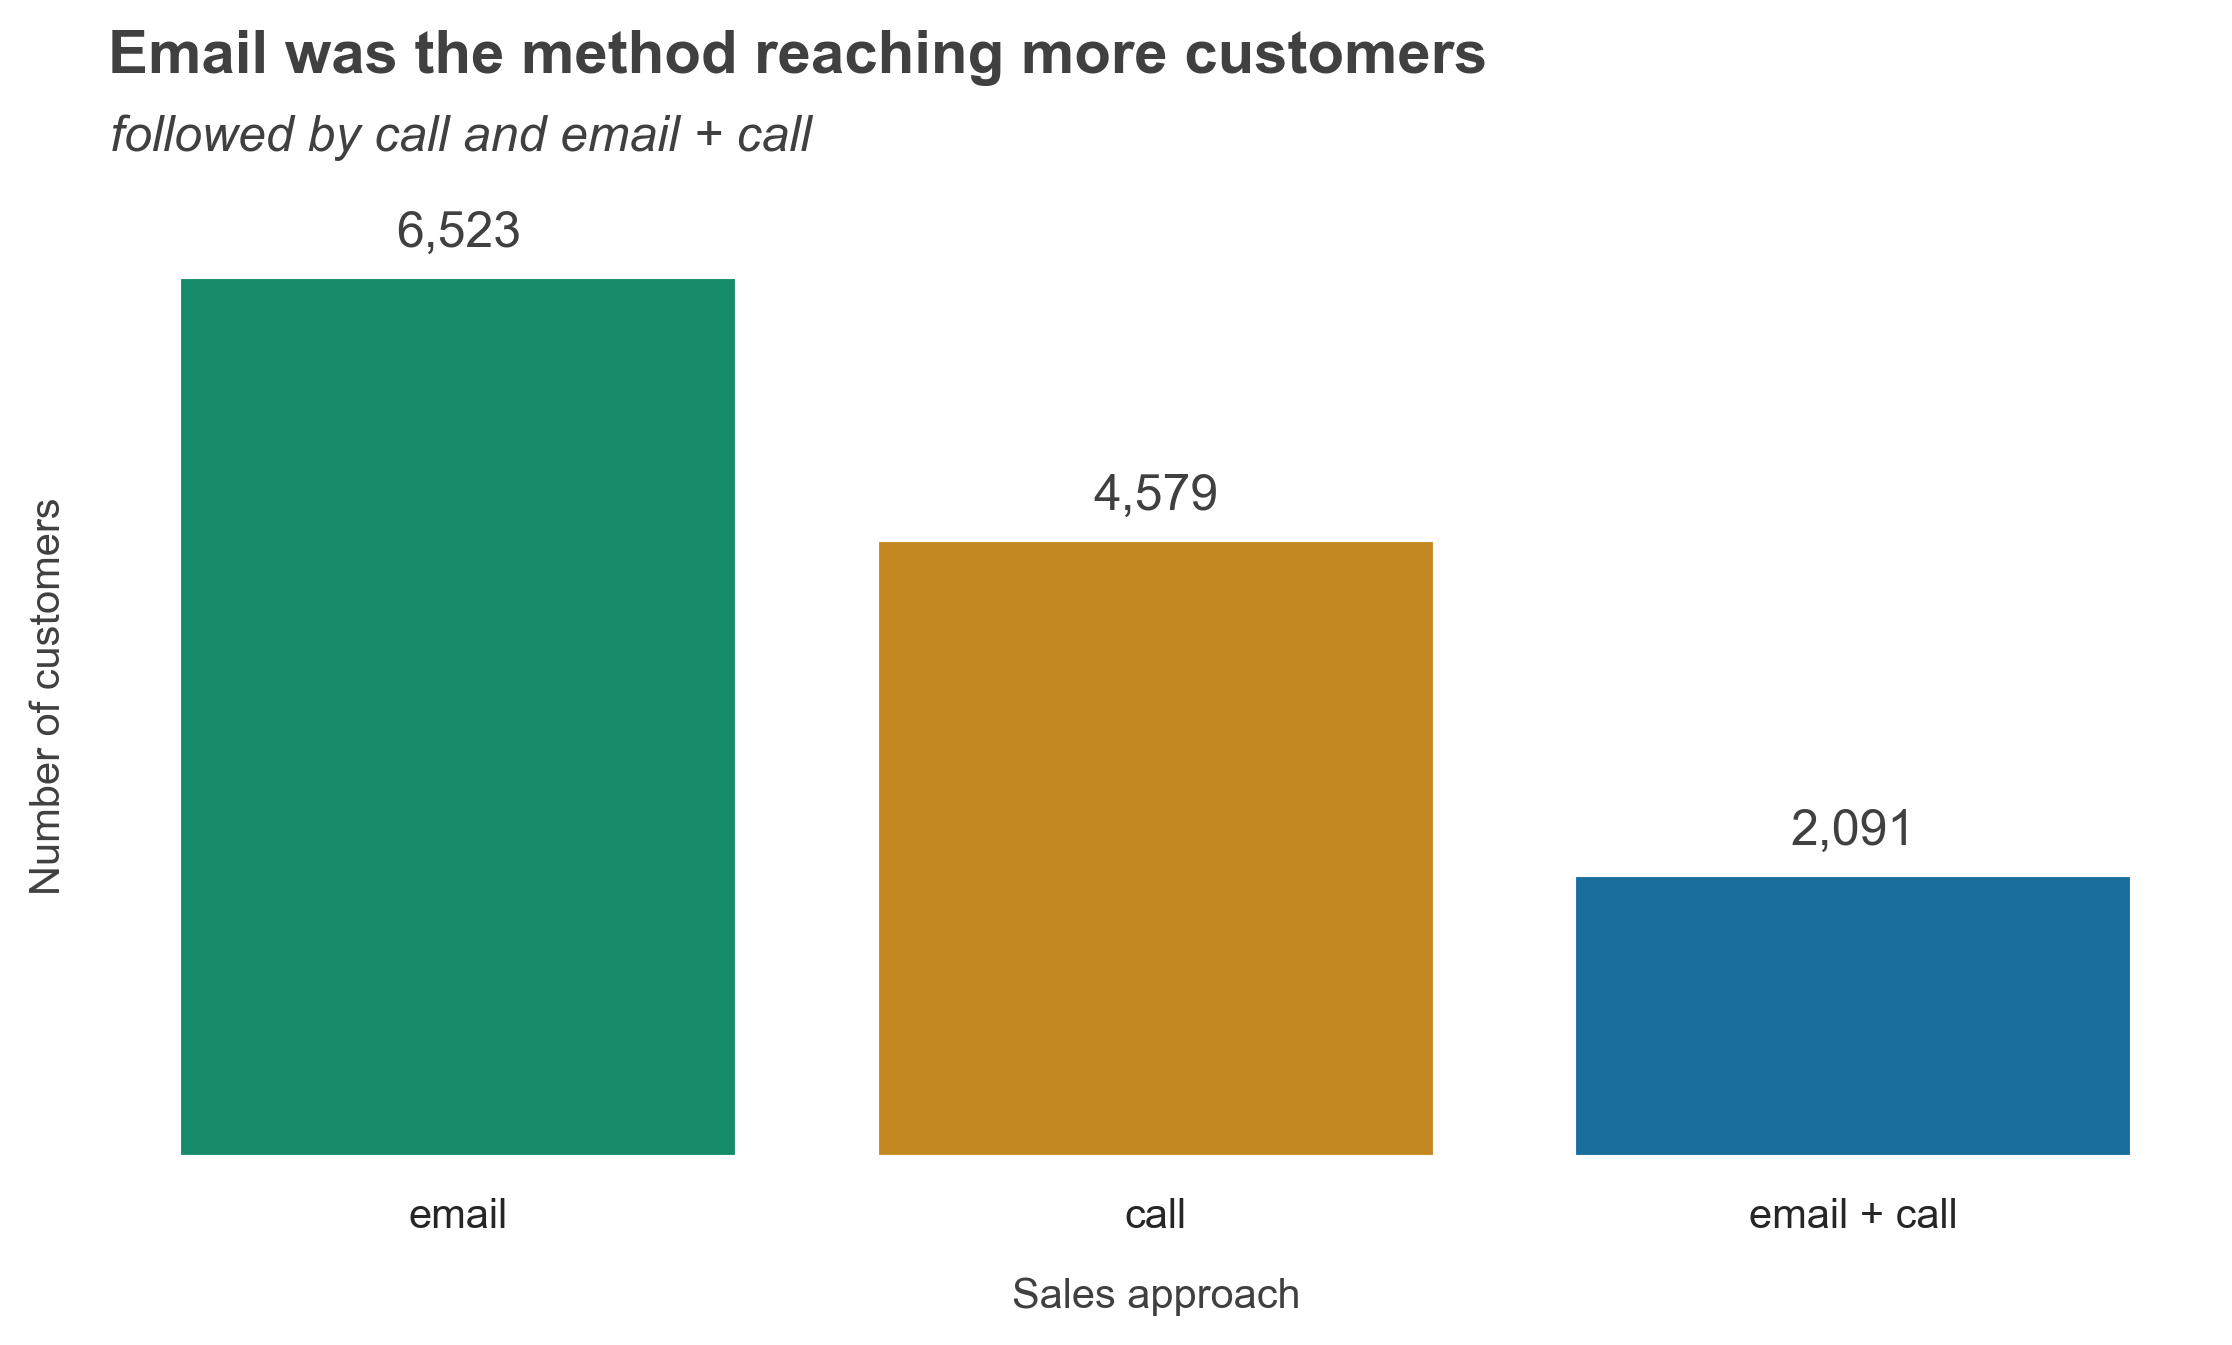

In [120]:
# Set clean style
sns.set_theme(style="white")  # White background, no gridlines
plt.style.use('my_style.mplstyle')
# Get the colorblind palette
colorblind_palette = sns.color_palette("colorblind")

# Define a custom palette using colors from the colorblind palette
custom_palette = {
    "email": colorblind_palette[2],  # Green
    "call": colorblind_palette[1],   # Orange
    "email + call": colorblind_palette[0]  # Blue
}

# Sort data descendingly (replace 'customer_id_by_approach_pivot' with sorted data)
customer_id_by_approach_pivot = customer_id_by_approach_pivot.sort_values(( 'customer_id', 'count'),ascending=False)

# Create plot with a single color
fig, ax = plt.subplots(figsize=(9, 4), dpi=300)
plot = sns.barplot(
    x='sales_method',
    y=( 'customer_id', 'count'),
    data=customer_id_by_approach_pivot,
    palette = custom_palette
)

# Label bars with formatted numbers
for container in plot.containers:
    plot.bar_label(container, fmt=lambda x: f"{x:,.0f}", label_type="edge", padding=5)  # Adds commas

# Improve titles and labels
plt.suptitle("Email was the method reaching more customers", fontsize='large', y=1.05, fontweight="bold", x=0.38)
plt.title("followed by call and email + call", fontsize='medium', fontstyle='oblique', pad=20, fontweight="normal")
plt.xlabel("Sales approach", labelpad=10)
plt.ylabel("Number of customers", labelpad=10)

# Remove spines and ticks
plt.tick_params(axis="y", left=False, labelleft=False)  # Hide y-axis labels (redundant with bar labels)

plt.show()

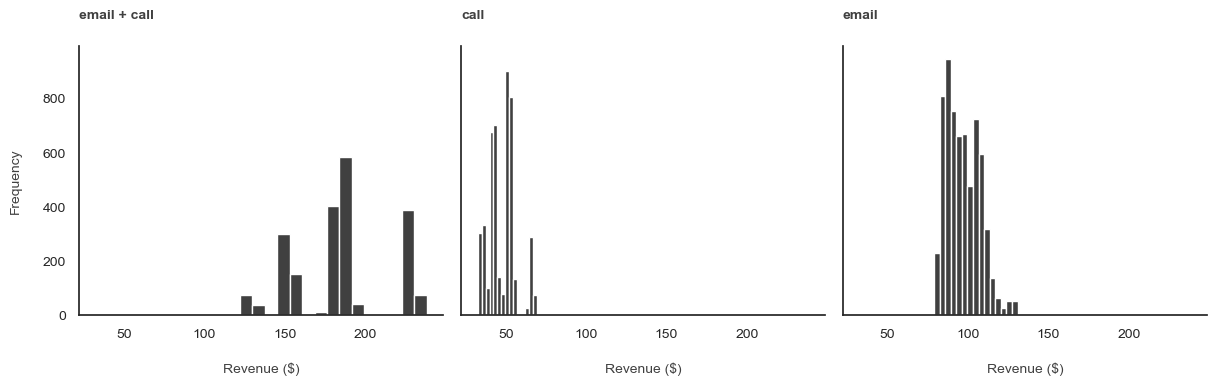

In [31]:
# Set clean style
sns.set_theme(style="white")  # White background, no gridlines
plt.style.use('my_style.mplstyle')

# FacetGrid for multi-approach comparison
grid = sns.FacetGrid(df, col="sales_method", height=4, col_wrap=3)
grid.map(plt.hist, "revenue", bins=15, color="#404040")
grid.set_titles("{col_name}")
grid.set_axis_labels("Revenue ($)", "Frequency")

C:\Users\andre.canal\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\andre.canal\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


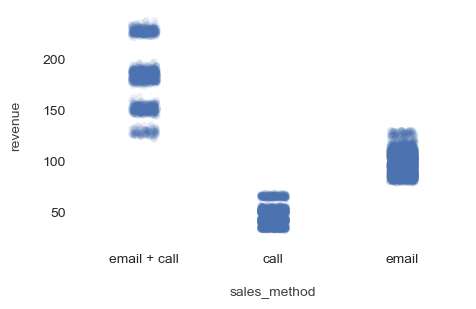

In [32]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=100)

strip = sns.stripplot(
    x="sales_method",
    y="revenue",
    data=df,
    jitter=True,  # Avoid overlapping dots
    alpha=0.1  # Transparency
)

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Sales approach'),
 Text(0.0, 1.0, '...and by the sales approach')]

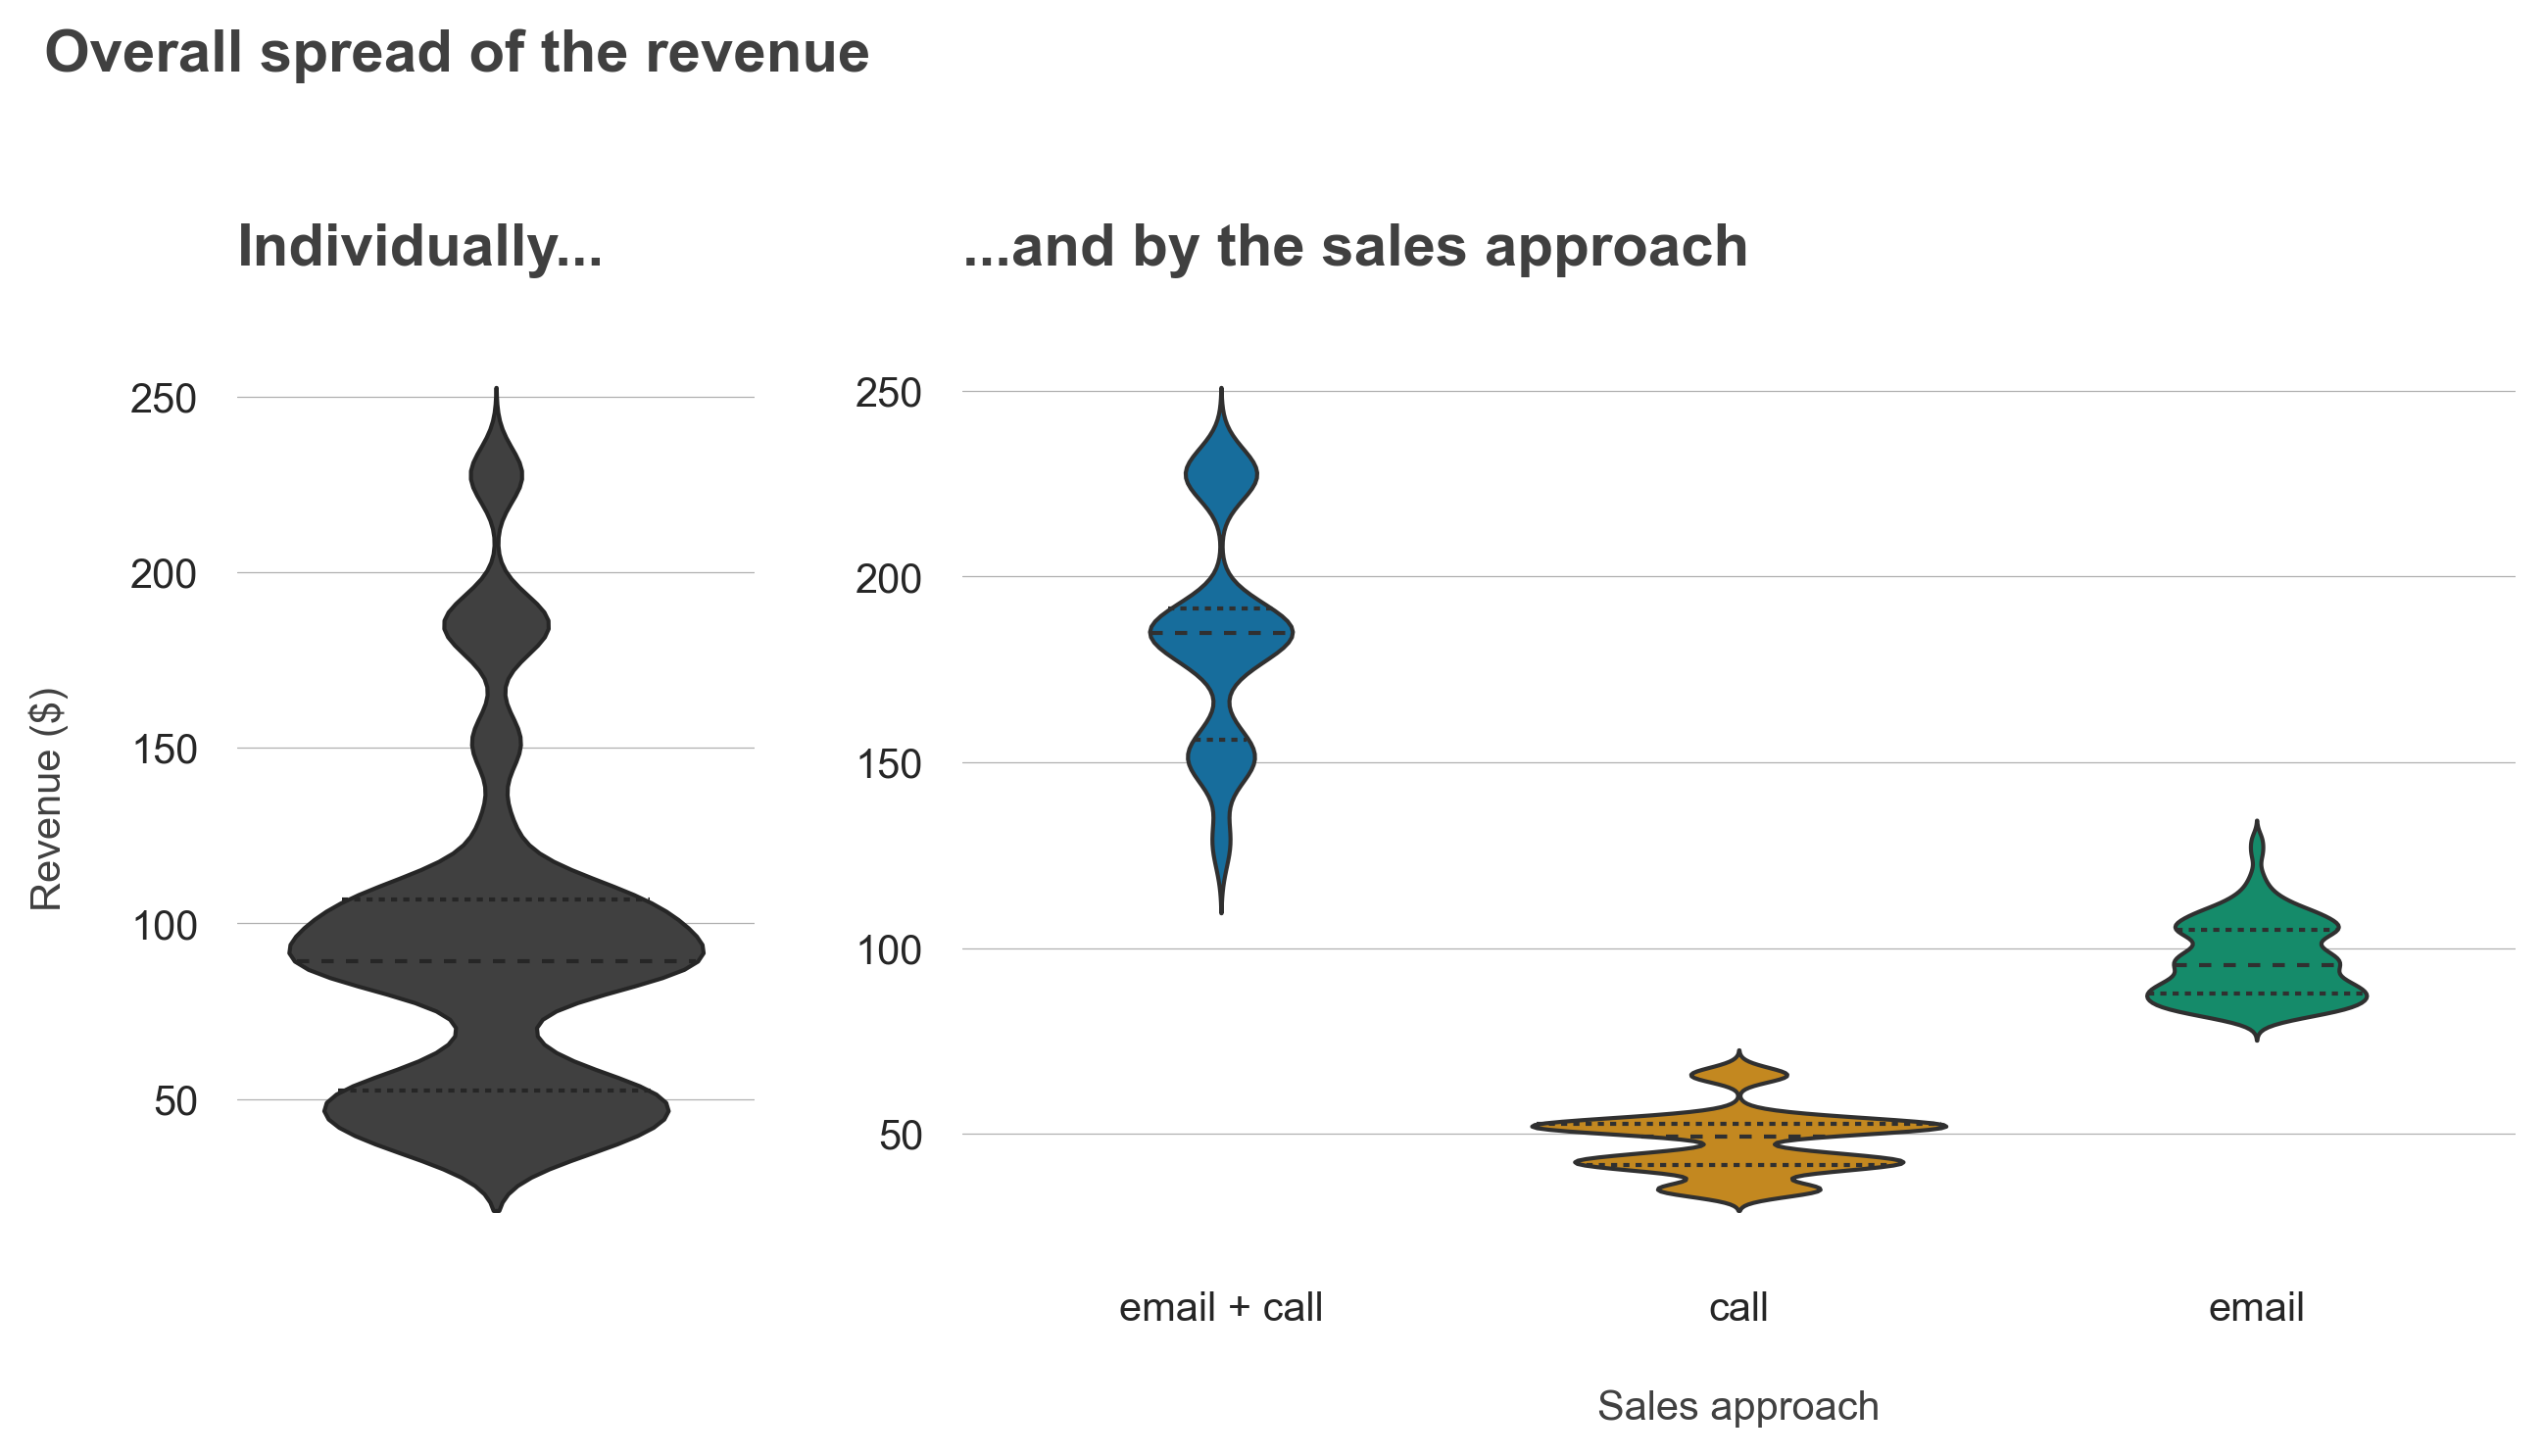

In [106]:
sns.set_theme(style="whitegrid")  # White background, no gridlines
plt.style.use('my_style.mplstyle')
sns.set_palette('colorblind')

fig, axs = plt.subplots(figsize=(10, 4), dpi=300, ncols=2, gridspec_kw={'width_ratios': [1, 3]})

fig.suptitle("Overall spread of the revenue", weight='bold', y=1.15, size='larger', x=0.2)

violin = sns.violinplot(
    #x="sales_method",
    y="revenue",
    color='#404040',
    data=df,
    inner="quartile",  # Show quartile lines inside
    ax=axs[0]
)
axs[0].set(ylabel="Revenue ($)", xlabel="", title="Individually...")



violin = sns.violinplot(
    x="sales_method",
    y="revenue",
    data=df,
    inner="quartile",  # Show quartile lines inside
    ax=axs[1]
)
axs[1].set(ylabel="", xlabel="Sales approach", title="...and by the sales approach")

## Question 2: What does the spread of the revenue look like overall? And for each method?

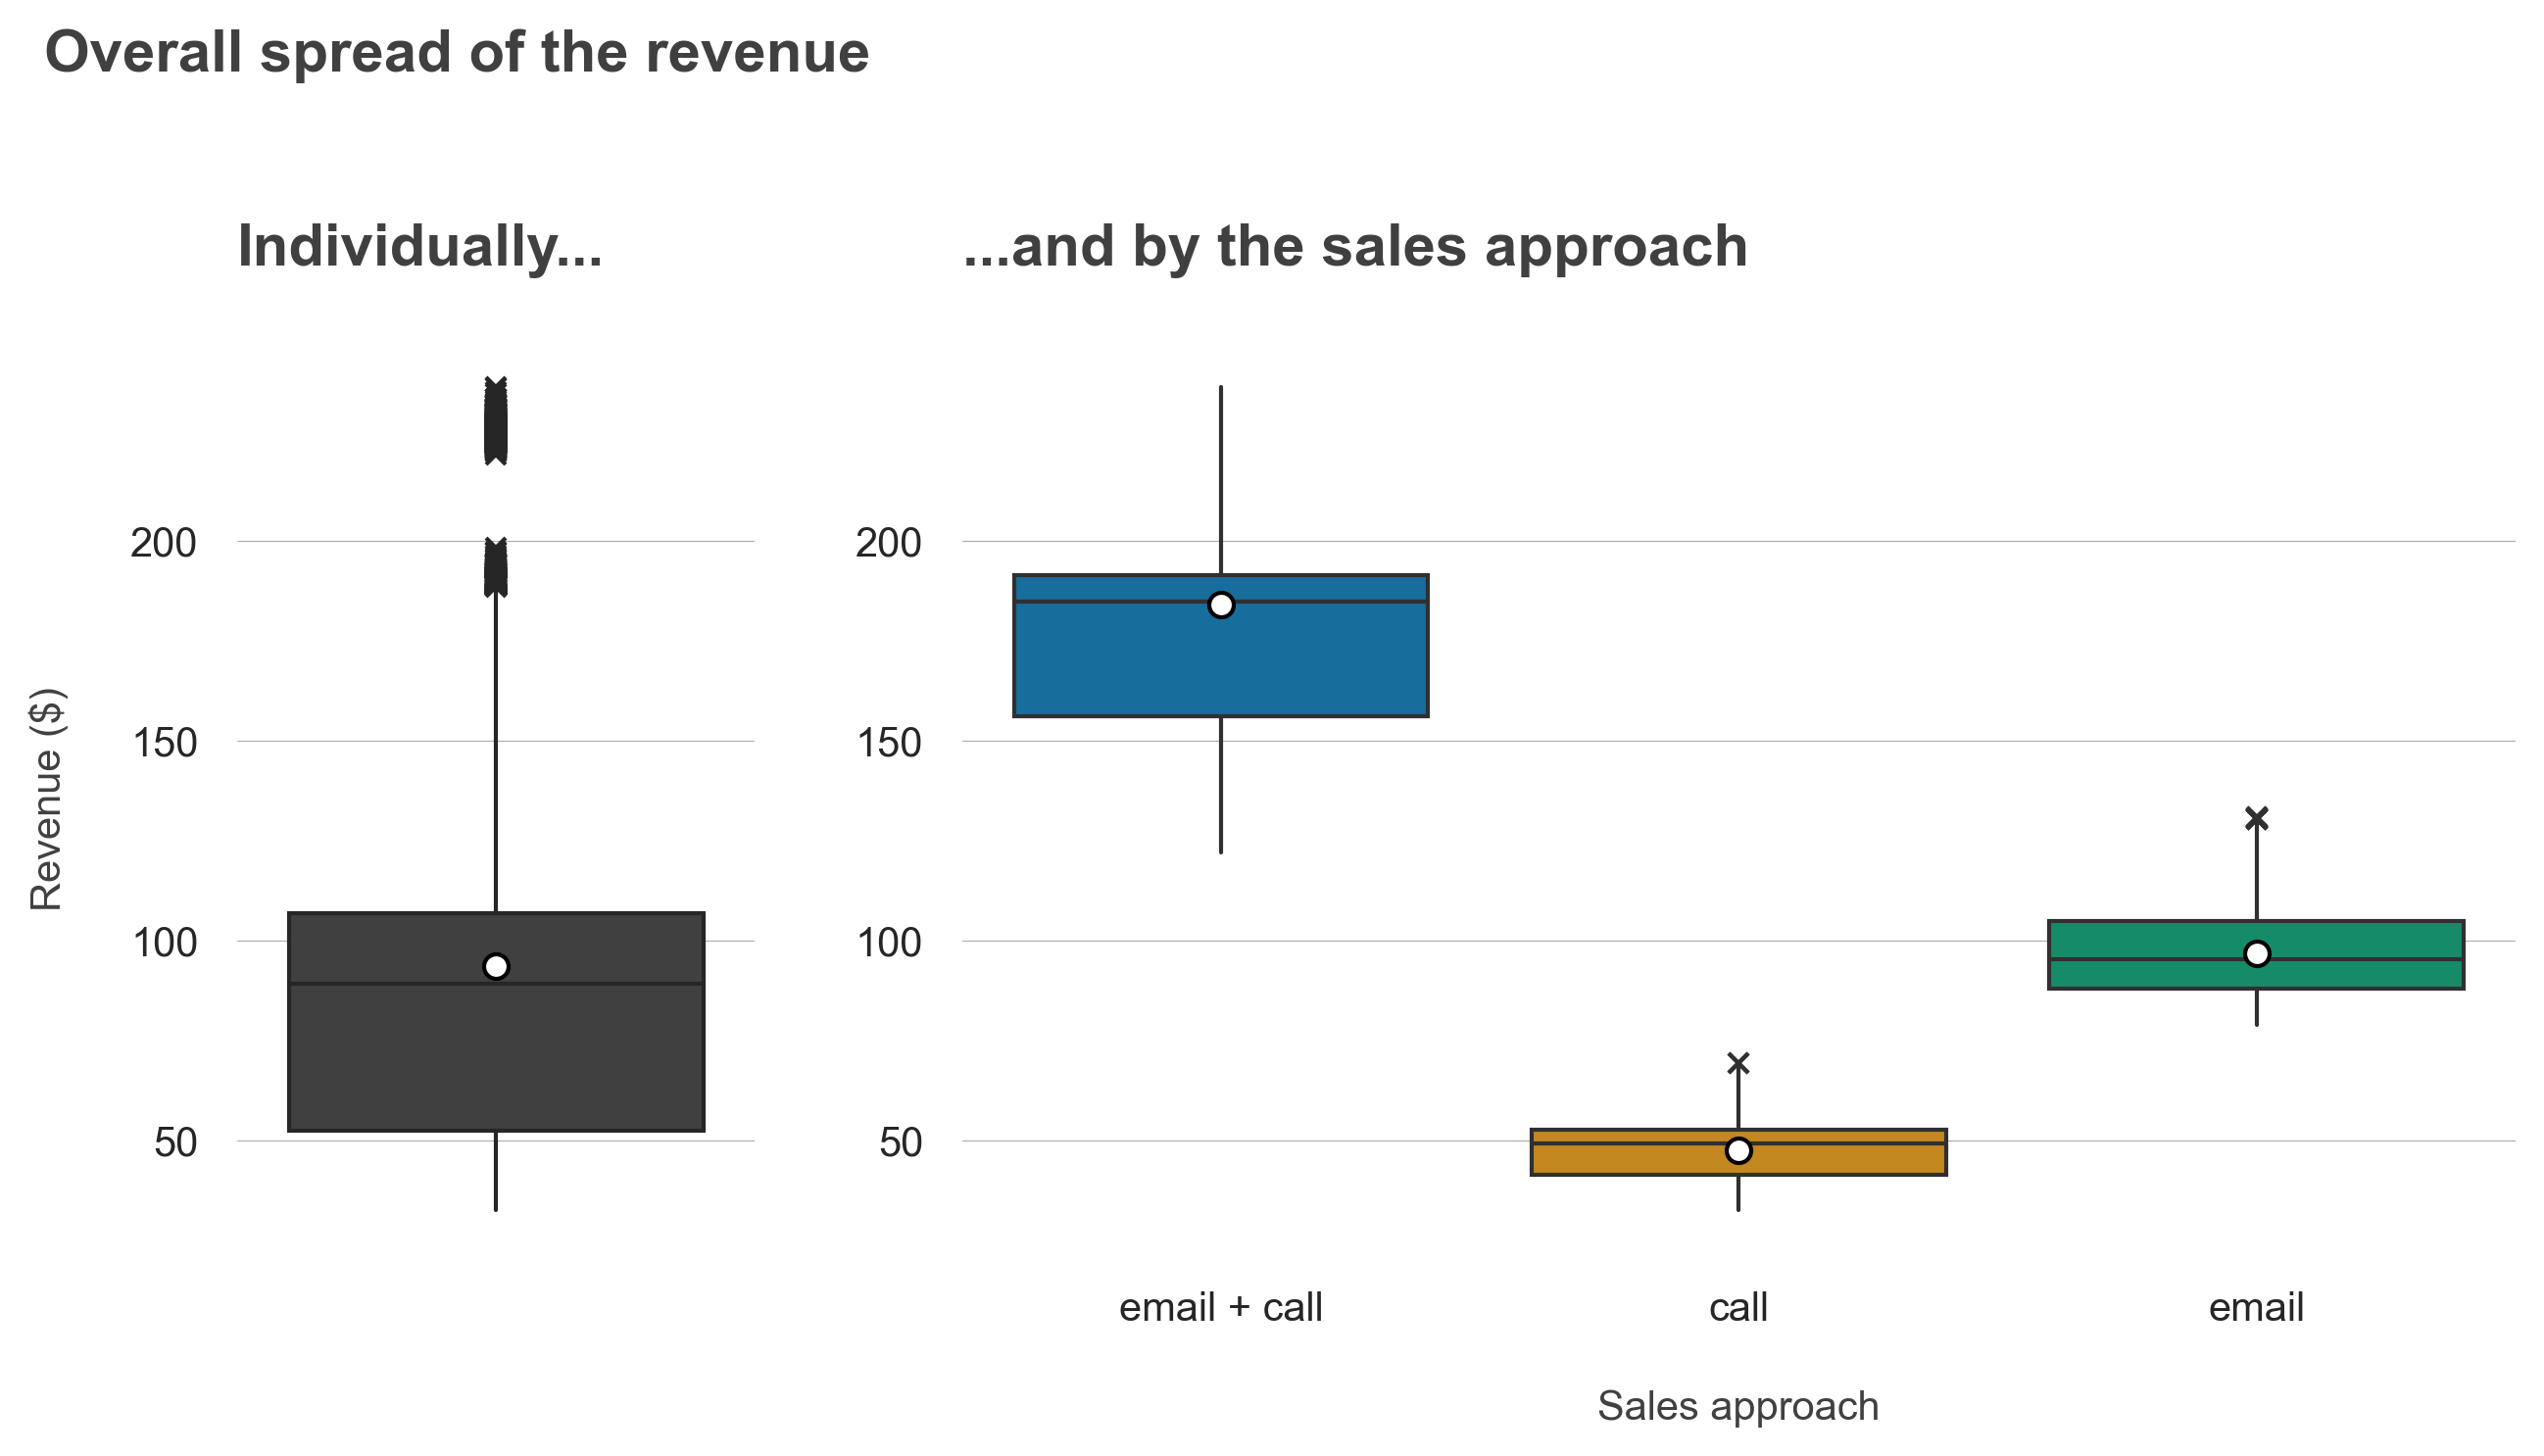

In [35]:
# Set style
sns.set_theme(style="whitegrid")  # White background, no gridlines
plt.style.use('my_style.mplstyle')
sns.set_palette('colorblind')

# Create box plot
fig, axs = plt.subplots(figsize=(10, 4), dpi=300, ncols=2, gridspec_kw={'width_ratios': [1, 3]})

fig.suptitle("Overall spread of the revenue", weight='bold', y=1.15, size='larger', x=0.2)

box = sns.boxplot(
    #x="sales_method",
    y="revenue",
    data=df,  # Replace `df` with your DataFrame
    color='#404040',
    showmeans=True,  # Optional: show mean as a marker
    flierprops={"marker": "x"},
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"},
    notch=False, showcaps=False,
    ax=axs[0]
)

axs[0].set(ylabel="Revenue ($)", xlabel="", title="Individually...")

box = sns.boxplot(
    x="sales_method",
    y="revenue",
    data=df,
    showmeans=True,  # Optional: show mean as a marker
    flierprops={"marker": "x"},
    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"},
    notch=False, showcaps=False,
    ax=axs[1]
)

axs[1].set(ylabel="", xlabel="Sales approach", title="...and by the sales approach")

plt.show()

C:\Users\andre.canal\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\andre.canal\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


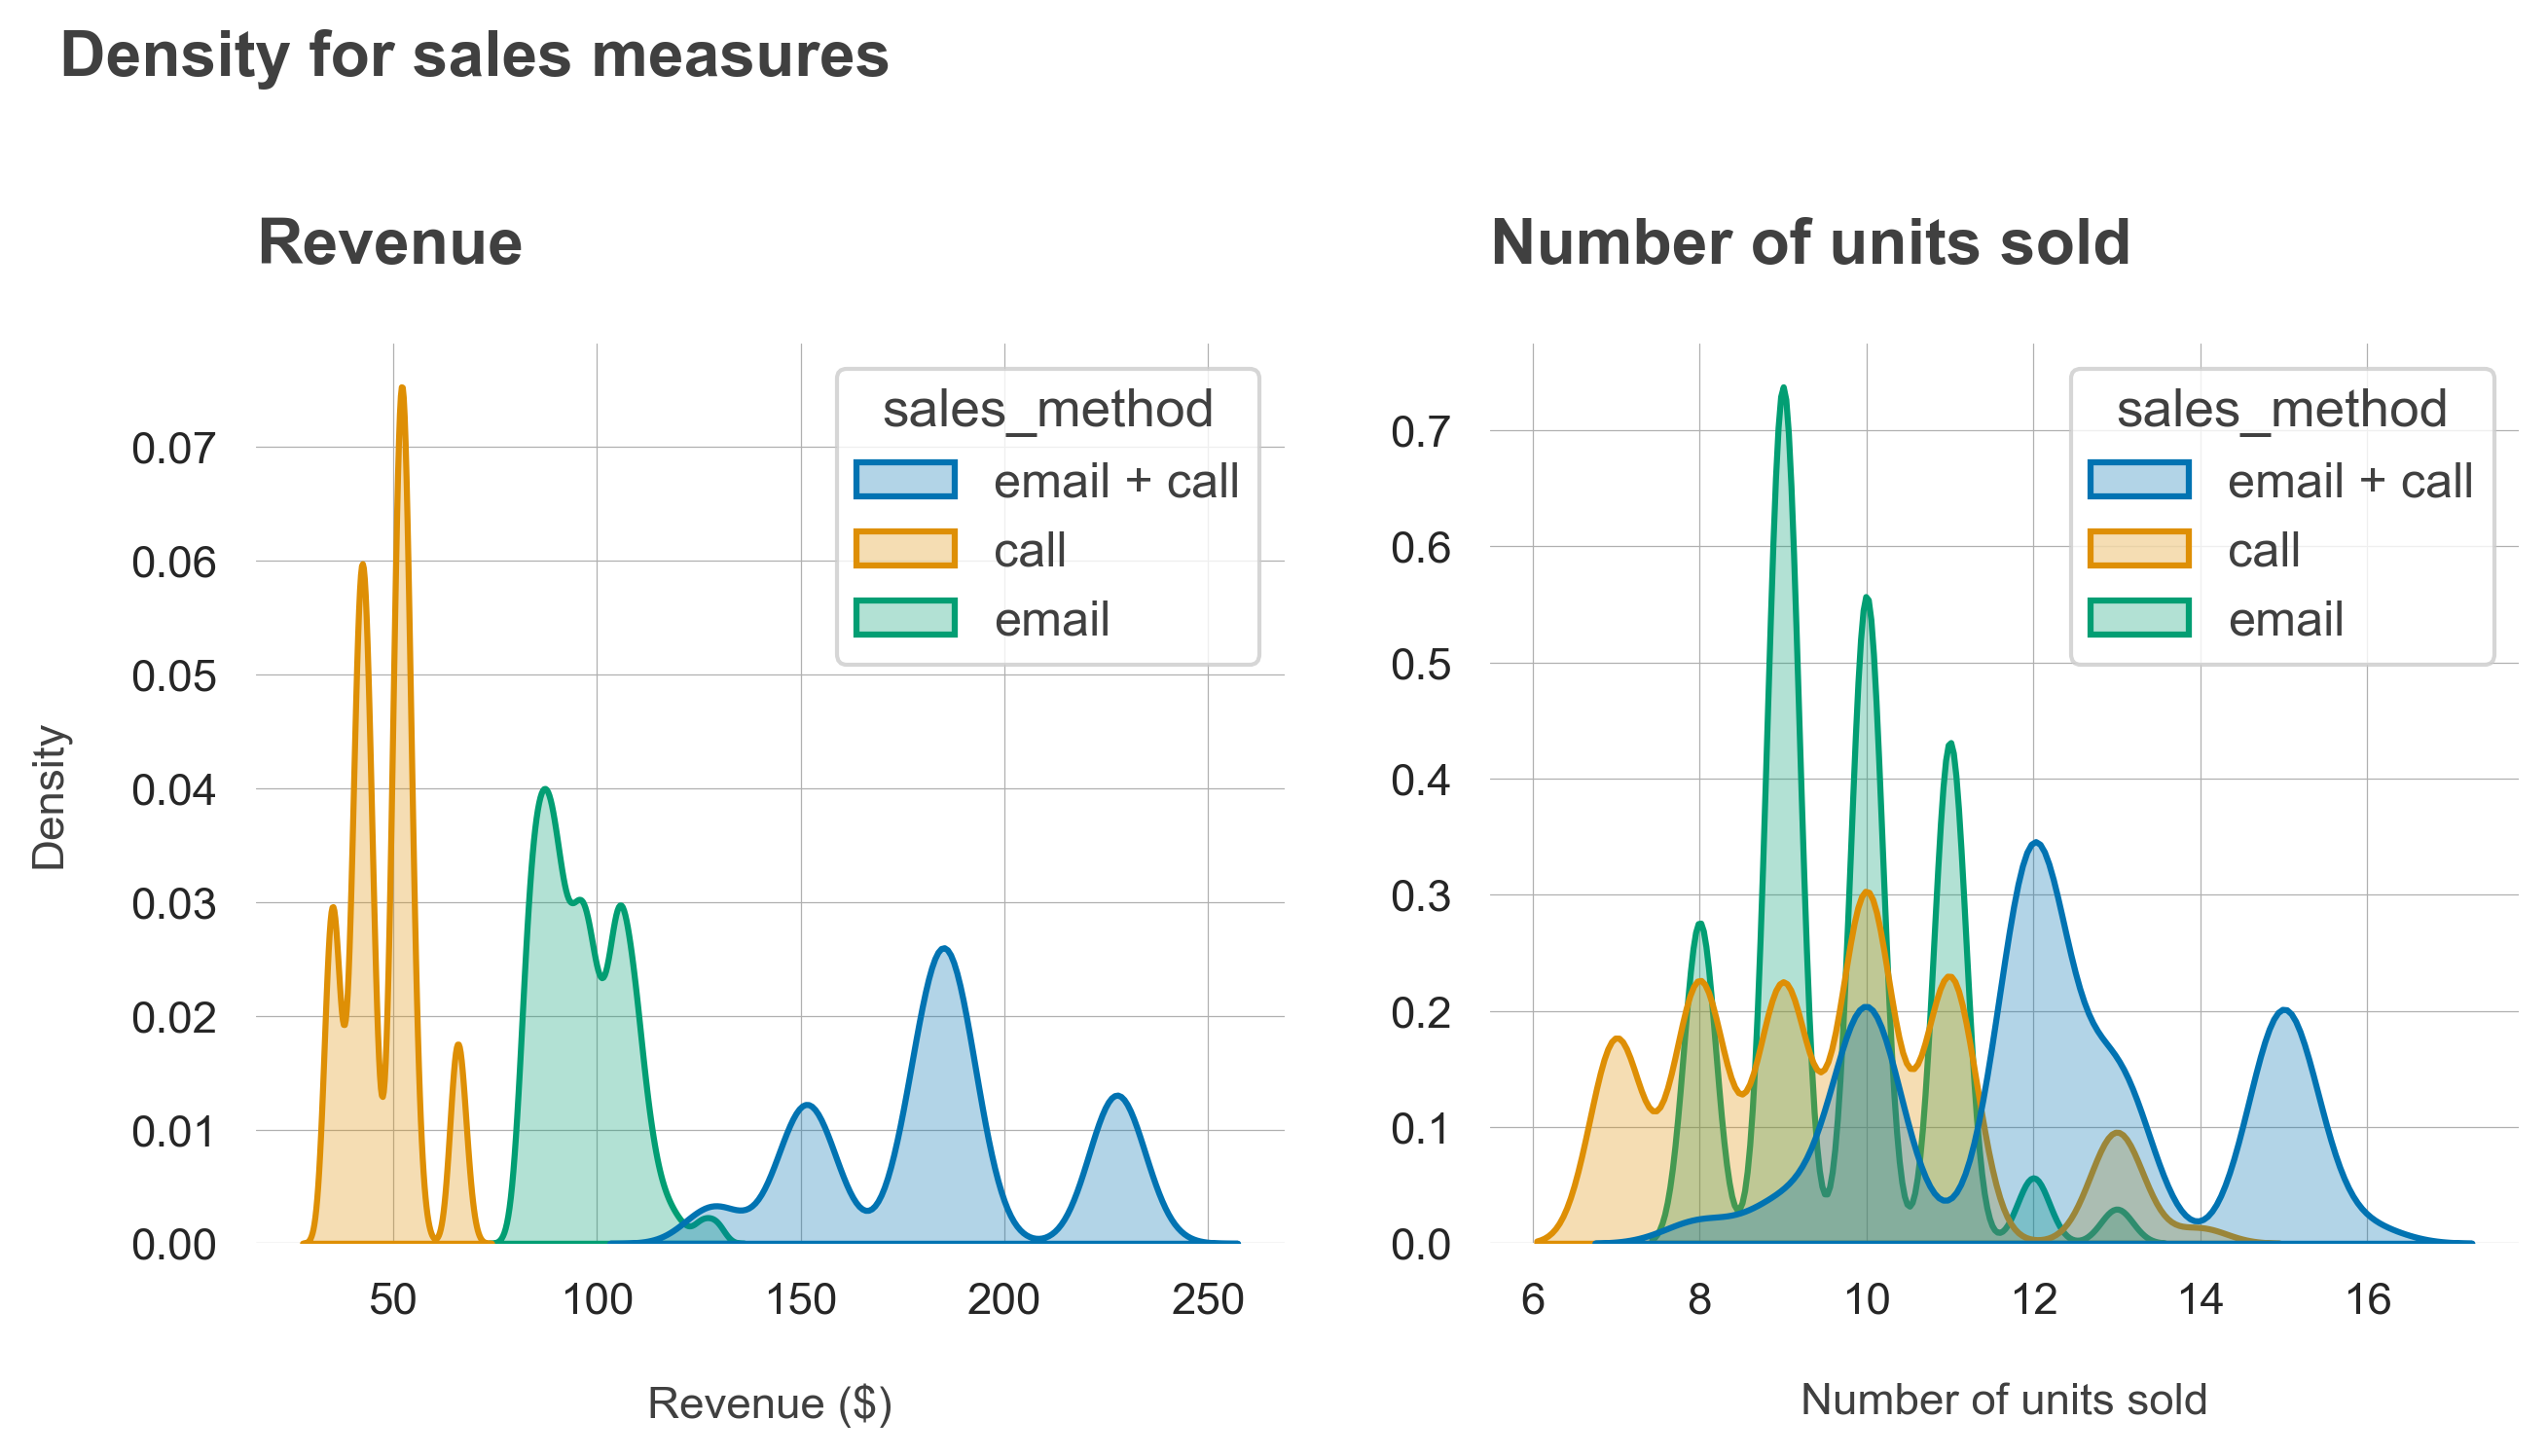

In [62]:
# Set style
sns.set_theme(style="whitegrid", font_scale=1.1)
plt.style.use('my_style.mplstyle')
sns.set_palette('colorblind')

# Create density plot
fig, axs = plt.subplots(figsize=(10, 4), dpi=300, ncols=2, gridspec_kw={'width_ratios': [1, 1]})

fig.suptitle("Density for sales measures", weight='bold', y=1.15, x=0.2)

sns.kdeplot(
    data=df,  # Replace with your DataFrame
    x="revenue",
    hue="sales_method",  # Color-code by method
    fill=True,
    alpha=0.3,  # Transparency for overlapping areas
    common_norm=False,  # Normalize each distribution independently
    linewidth=1.5,
    ax=axs[0]
)
axs[0].set(title= "Revenue", xlabel="Revenue ($)", ylabel="Density")

sns.kdeplot(
    data=df,  # Replace with your DataFrame
    x="nb_sold",
    hue="sales_method",  # Color-code by method
    fill=True,
    alpha=0.3,  # Transparency for overlapping areas
    common_norm=False,  # Normalize each distribution independently
    linewidth=1.5,
    ax=axs[1]
)
axs[1].set(title="Number of units sold", xlabel="Number of units sold", ylabel="")

plt.show()

In [64]:
# Aggregate data (example: monthly revenue)
df_week = df.groupby(["week", "sales_method"]).agg({"revenue": ["sum",'max','mean','median','count']}).reset_index()
df_week.sort_values(['week',('revenue', 'count')])

week  sales_method    revenue                                   
                             sum     max        mean   median count
2     1  email + call   15076.14  136.36  128.855897  128.590   117
0     1          call   24507.65   40.47   35.364574   35.210   693
1     1         email  217574.69  112.88   87.555207   86.590  2485
5     2  email + call   24220.75  164.14  154.272293  154.270   157
3     2          call   32492.37   50.19   43.613919   43.470   745
4     2         email  132405.24  124.24  100.155250   99.220  1322
8     3  email + call   45260.36  159.55  150.366645  149.840   301
6     3          call   34722.52   50.66   41.784019   41.510   831
7     3         email   94519.55  117.46   92.757164   91.800  1019
11    4  email + call   74338.88  192.09  180.873187  180.620   411
9     4          call   48565.54   57.74   51.446547   51.260   944
10    4         email  102790.53  126.01  108.773048  108.080   945
14    5  email + call  119091.98  198.32  187.546425  187.120   635
13    5         email   71316.23  127.87  108.879740  108.020   655
12    5          call   51606.65   58.01   53.147940   52.970   971
16    6         email   12383.02  130.85  127.660000  127.830    97
15    6          call   26087.54   69.47   66.044405   65.880   395
17    6  email + call  107060.70  238.32  227.788723  227.405   470

In [66]:
df[(df['week'] == 1) & (df['sales_method'] == 'email')].groupby('sales_method').agg({'revenue':['sum','max','mean','count', 'median']})

revenue                                
                    sum     max       mean count median
sales_method                                           
email         217574.69  112.88  87.555207  2485  86.59

In [68]:
df[(df['week'] == 1) & (df['sales_method'] == 'email')]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
7,1,email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,oklahoma
18,1,email,78343227-76c7-493f-a01a-0e8f87bafb0a,8,82.01,4,24,north dakota
19,1,email,ca2fcee8-81f2-455a-a766-5213c56a7775,9,90.93,2,28,florida
20,1,email,ad1d8be5-aa0a-41e1-bbc6-7889b4a14521,9,90.51,4,25,texas
43,1,email,d6945318-f8a5-4081-a498-89ce910df78e,8,84.23,3,23,arkansas
...,...,...,...,...,...,...,...,...
14958,1,email,ef4f2a47-a680-490b-8ae8-ef5fdb619b8d,8,81.17,11,26,michigan
14971,1,email,7c0b402b-bd80-4817-baf2-e7a1d1776b82,9,92.53,3,25,washington
14978,1,email,52535cb5-60cd-4e13-aca1-4fedcd4f5bb0,8,82.54,2,18,california
14987,1,email,bb4b9fb0-f704-4da5-bc1c-6c3545860430,10,97.08,5,22,hawaii


## Question 3: Was there any difference in revenue over time for each of the methods?

C:\Users\andre.canal\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\andre.canal\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


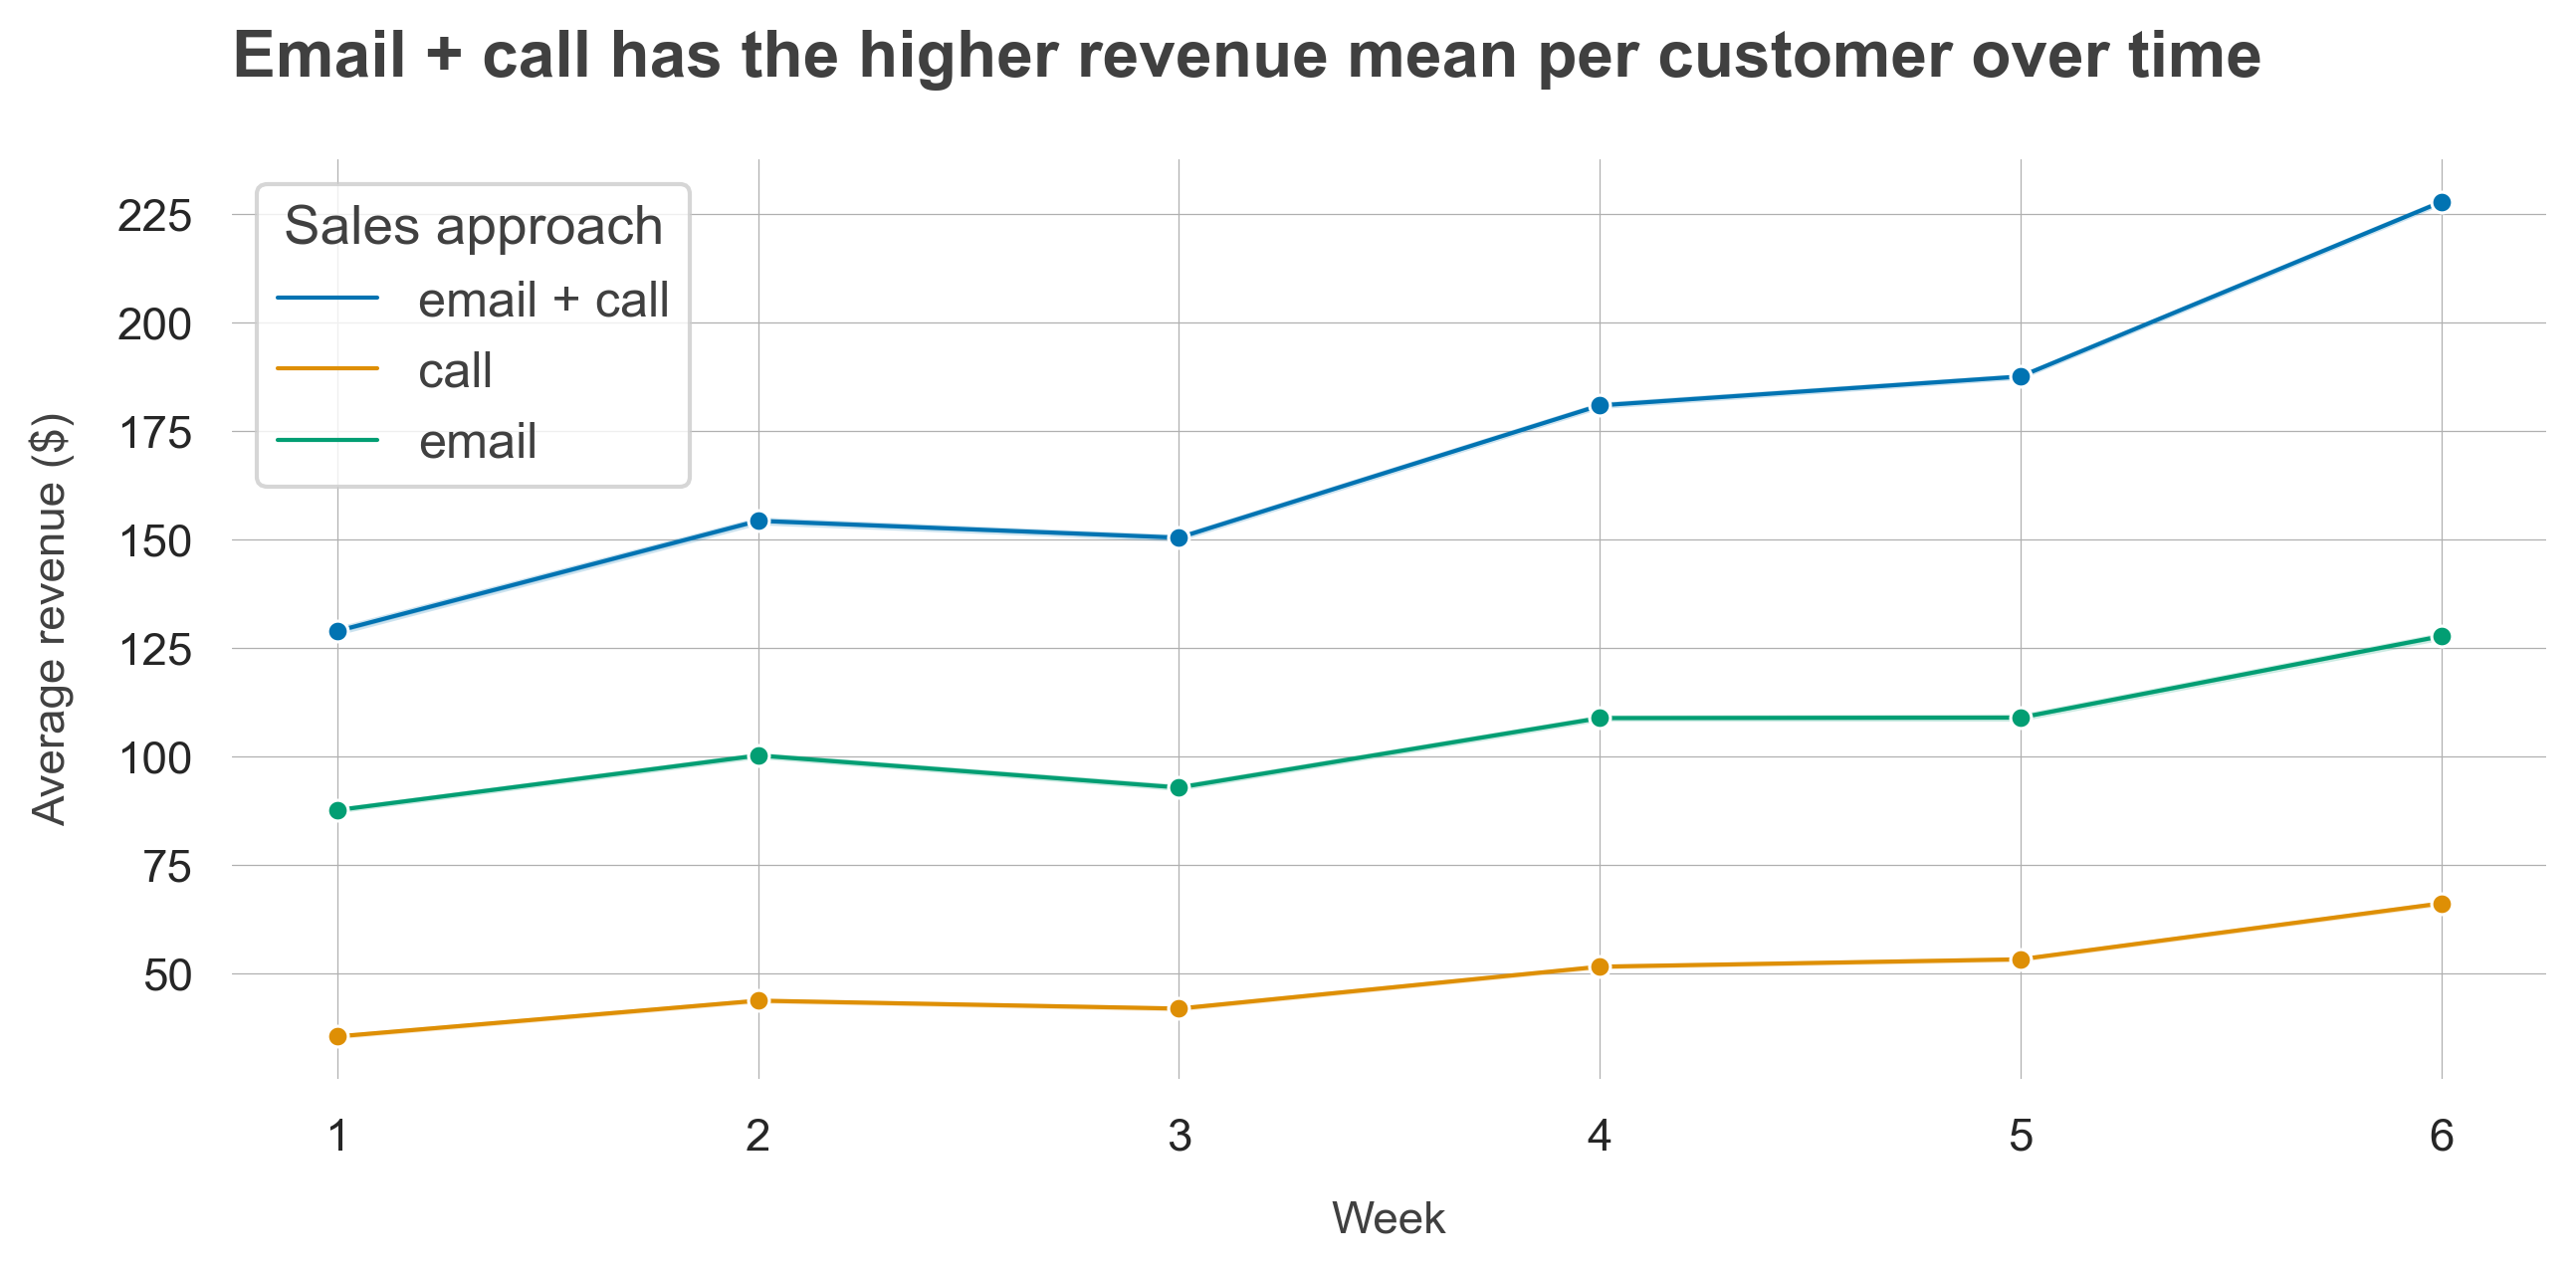

In [108]:
# Calculate cumulative sum for each sales_method
df['cumulative_revenue'] = df.groupby('sales_method')['revenue'].cumsum()
df['cumulative_revenue_formated'] = df['cumulative_revenue']/1000

sns.set_theme(style="whitegrid", font_scale=1.1)
plt.style.use('my_style.mplstyle')
sns.set_palette('colorblind')

fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
sns.lineplot(
    data=df,
    x="week",
    y="revenue",
    hue="sales_method",
    marker="o",  # Add markers for data points
    palette='colorblind',  # Professional colors
    estimator='mean'
)
plt.title("Email + call has the higher revenue mean per customer over time")
plt.xlabel("Week", labelpad=10)
plt.ylabel("Average revenue ($)", labelpad=10)
plt.legend(title="Sales approach")
plt.show()

C:\Users\andre.canal\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\andre.canal\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


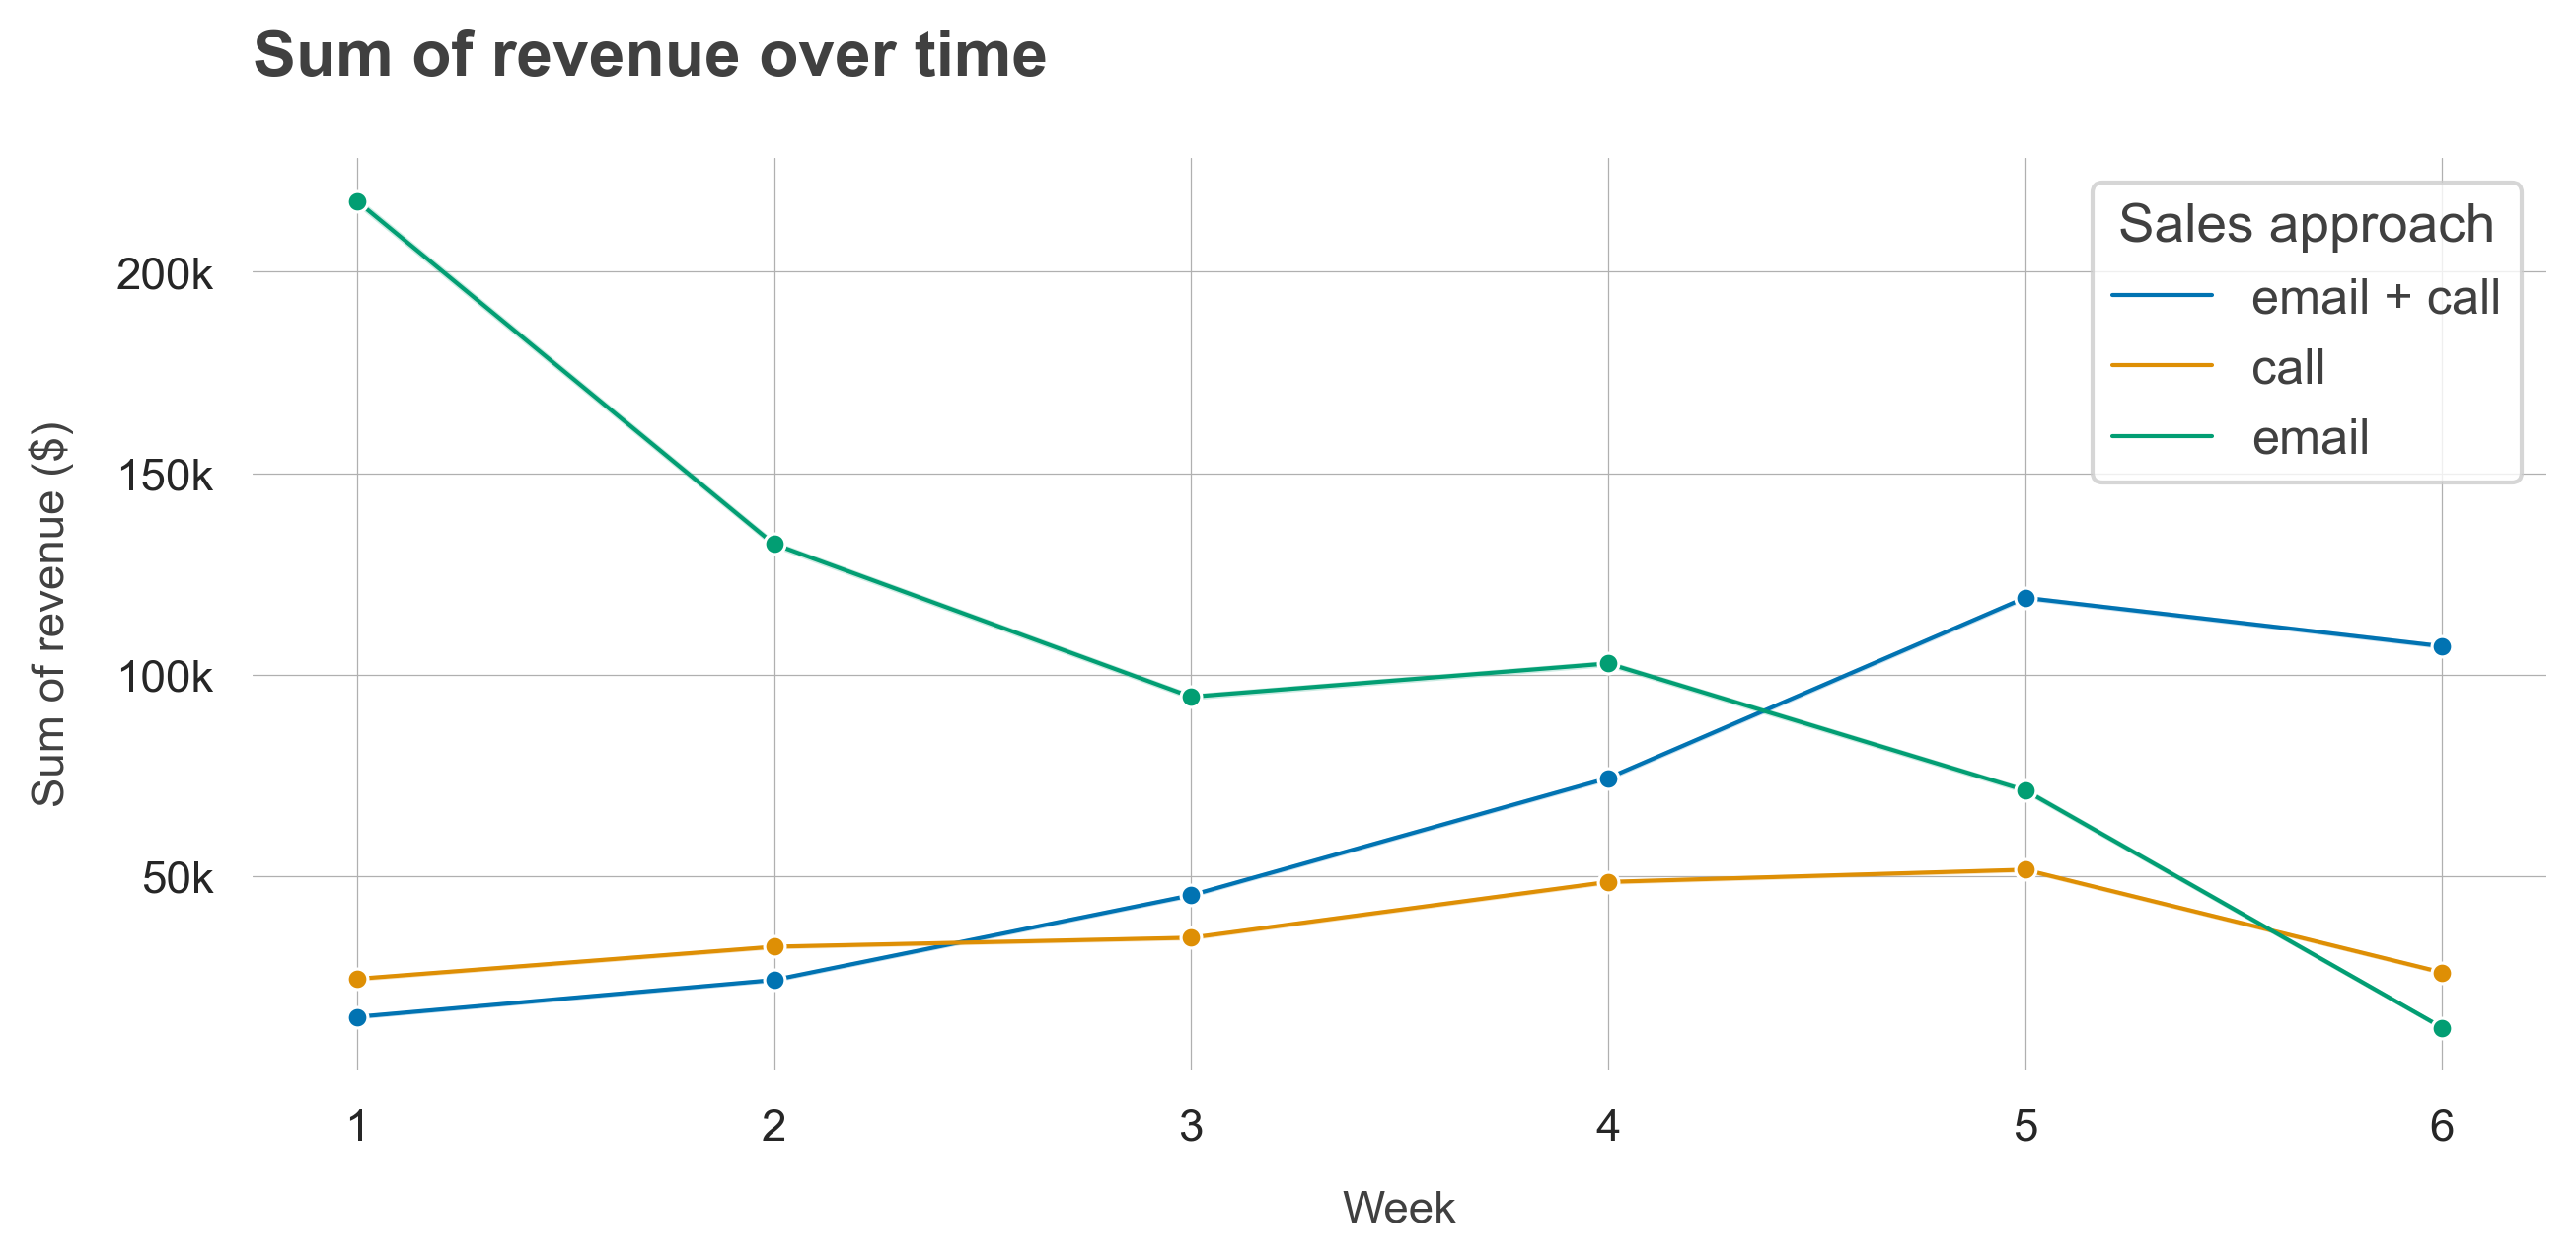

In [72]:
sns.set_theme(style="whitegrid", font_scale=1.1)
plt.style.use('my_style.mplstyle')
sns.set_palette('colorblind')

fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
sns.lineplot(
    data=df,
    x="week",
    y="revenue",
    hue="sales_method",
    marker="o",  # Add markers for data points
    palette='colorblind',  # Professional colors
    estimator='sum'
)

# Custom formatter function
def format_ticks(value, _):
    return f'{int(value / 1000)}k'  # Divide by 1000 and add 'k'

# Apply the formatter to the y-axis
formatter = FuncFormatter(format_ticks)

ax.yaxis.set_major_formatter(formatter)  # Apply custom formatting

plt.title("Sum of revenue over time")
plt.xlabel("Week", labelpad=10)
plt.ylabel("Sum of revenue ($)", labelpad=10)
plt.legend(title="Sales approach")
plt.show()

C:\Users\andre.canal\AppData\Local\Temp\ipykernel_15316\3144380021.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
C:\Users\andre.canal\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\andre.canal\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


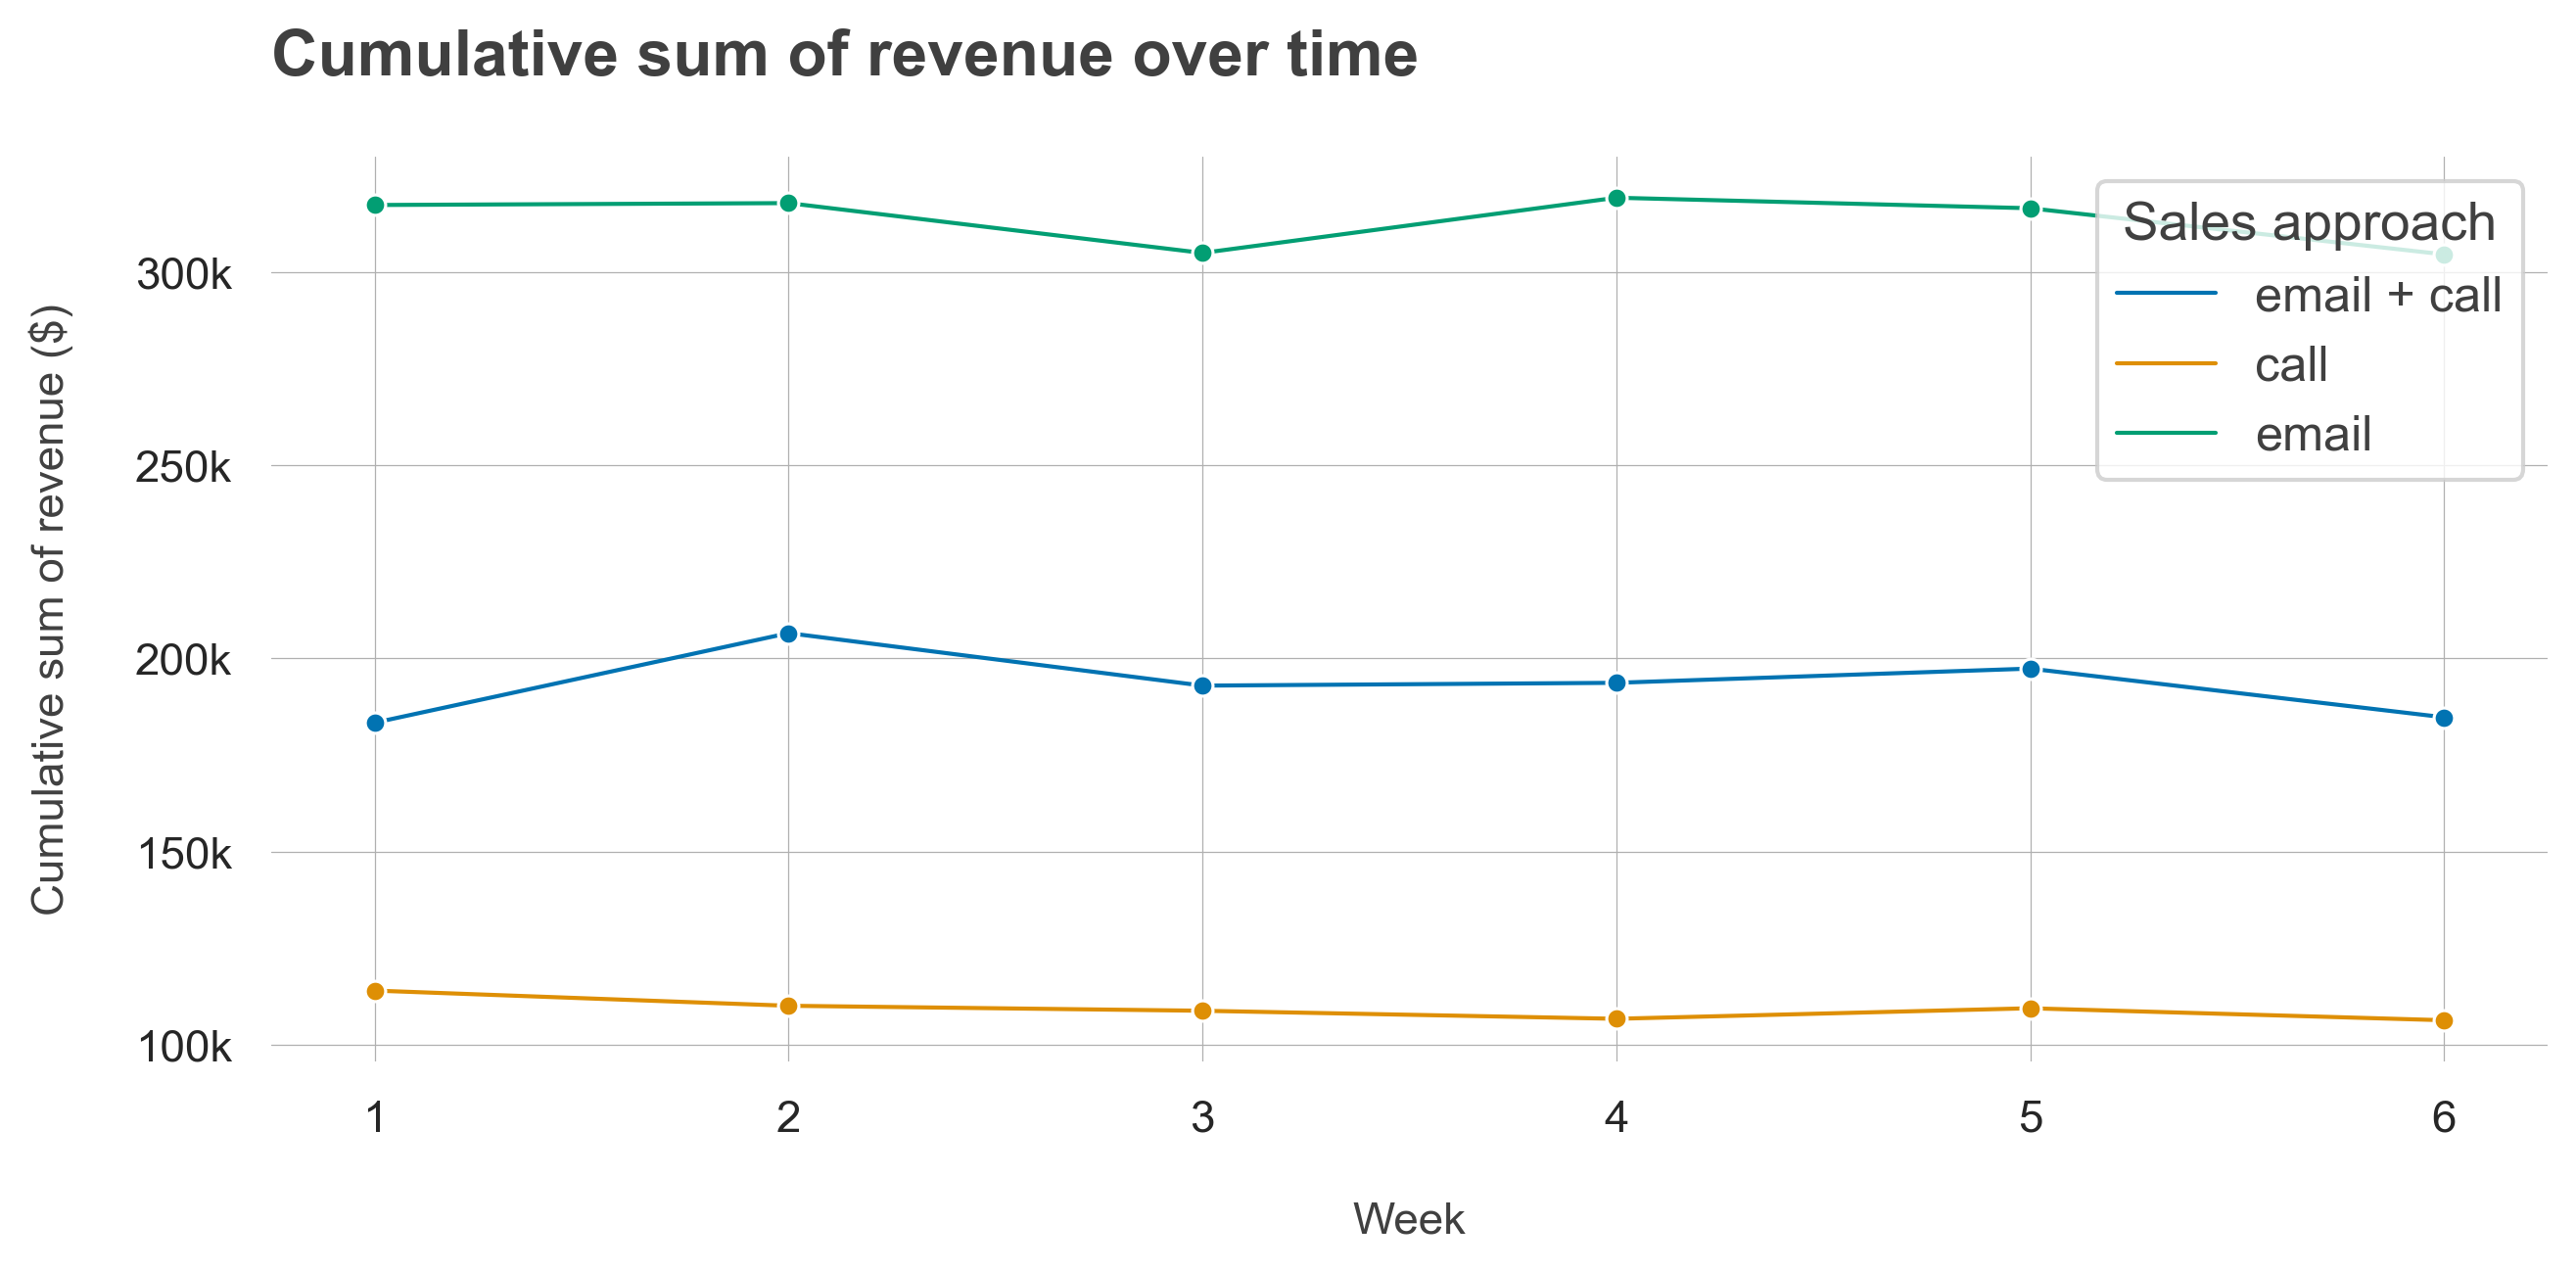

In [74]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
sns.lineplot(
    data=df,
    x="week",
    y="cumulative_revenue",  # Use the precomputed cumulative revenue
    hue="sales_method",
    marker="o",  # Add markers for data points
    palette='colorblind',  # Professional colors
    ci=None
)

ax.yaxis.set_major_formatter(formatter)  # Apply custom formatting

plt.title("Cumulative sum of revenue over time")
plt.ylabel("Cumulative sum of revenue ($)")
plt.xlabel("Week")
plt.legend(title="Sales approach")
plt.show()